In [1]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [1]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util,correlation_plots

import imp
imp.reload(correlation_plots)

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


<module 'correlation_plots' from '/home/sebouh/di-hadron/correlation_plots.py'>

In [2]:
#sets =  "D_C C D_Fe Fe Pb D_Pb".split()
#sets += "MC_D2 MC_C MC_Fe MC_Pb".split()
#sets += "no_ecuts_D_C no_ecuts_C no_ecuts_D_Fe no_ecuts_Fe no_ecuts_Pb no_ecuts_D_Pb".split()
#sets += "xQ2_D_C xQ2_C xQ2_D_Fe xQ2_Fe xQ2_Pb xQ2_D_Pb".split()

#dfs_mixed = {a : root_pandas.read_root("../../eg2/python/mixed_%s.root"%a)  for a in sets}

#mixtag='xQ2_'
dfs_mixed = {}#{a : root_pandas.read_root(f"/home/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}

In [4]:
directory = "."
dfs_data = {a : root_pandas.read_root(f"{directory}/Data_Pairs_%s.root" %a.replace("D_",""),a) for a in "D_C C D_Fe Fe Pb D_Pb".split()}


dfs_trigger = {a : root_pandas.read_root(f"{directory}/Data_Pairs_%s.root" %a.replace("D_",""),a+"_trigger") for a in "D_C C D_Fe Fe Pb D_Pb".split()}



In [ ]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

pathGIBUU="./"
for target in ['D','C','Fe','Pb']:
    #GiBUU
    print (target)
    print (' trigger')
    dfs_trigger['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), 
                                                           '%s_trigger'%target)
    print (' pairs')
    dfs_data['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), target)
    
print (dfs_trigger.keys())

In [25]:
#now load MC
#dfs_data.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a) for a in "Pb D C Fe".split()})




In [26]:
#dfs_trigger.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a + "_trigger") for a in "Pb D C Fe".split()})



In [5]:
for dct in dfs_data, dfs_trigger:
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])
    print(dct.keys())

dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'D'])
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'D'])


In [6]:
for df in dfs_data.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)
        df['h2_FidCutPiPlus'] = [1]*len(df)
for df in dfs_mixed.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)
        df['h2_FidCutPiPlus'] = [1]*len(df)
for df in dfs_trigger.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)

In [15]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_data.keys()):
    isMC=False
    if 'GiBUU' in key:
        isMC=True
    
    if '_2pi' in key or '_pi_p' in key:
        continue
    print(f"\n\n{key}")
    if key in dfs_mixed.keys() and 'dphi' not in dfs_mixed[key].columns:
        dfs_mixed[key].eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)
        dfs_mixed[key].eval(f'dphi = abs(diff_phi_cm)', inplace=True)
    
    if 'h1_cm_pt' not in dfs_data[key].columns:
        dfs_data[key].eval("h1_cm_pt = h1_cm_")
    
    data_trigger_cuts = dfs_data[key]#R2h_module.applyCuts(dfs_data[key],nomCuts=True)
    if key in dfs_mixed.keys():
        mixed_trigger_cuts = dfs_mixed[key]#R2h_module.applyCuts(dfs_mixed[key],nomCuts=True)
    
    dfs_data[key + '_2pi'] = R2h_module.applyCutsPair(data_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=False)
    dfs_data[key + '_pi_p'] = R2h_module.applyCutsPair(data_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=True)
    dfs_trigger[key] = R2h_module.applyCuts(dfs_trigger[key],name='default',isMC=isMC,isTrigger=True,
                                 nomCuts=True)
    if key in dfs_mixed.keys():
        mixed_trigger_cuts = R2h_module.applyCuts(dfs_mixed[key])    
        dfs_mixed[key + '_2pi'] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                                 nomCuts=True,h2Proton=False)
        dfs_mixed[key + '_pi_p'] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                                 nomCuts=True,h2Proton=True)
    
    #for df in (dfs_data[key + '_2pi'],dfs_data[key + '_pi_p'],
    #          dfs_mixed[key + '_2pi'],dfs_mixed[key + '_pi_p']):
    #    df.eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    #    df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)



D_C
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00  %)
2.2 < nu < 4.2 1433772  (98.46  %)
secondary hadrons are pions 1177886  (82.15  %)
(h1_p+h2_p)/nu<1.0 1042162  (88.48  %)
(h1_pid*h2_pid)<0, opposite charge pions 503306  (48.29  %)
kinematic limits for h2_z 495163  (98.38  %)
kinematic limits for dphi 494693  (99.91  %)
kinematic limits for pair_mass 462961  (93.59  %)
leading hadrons are pions 144176  (31.14  %)
0.2<h2_p<5.0 144176  (100.00  %)
0.2<h1_p<5.0 144176  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 144176  (100.00  %)
10<h2_th 144176  (100.00  %)
Theta/P fiducial region selected for secondary hadron 144176  (100.00  %)
10< h1_th 144176  (100.00  %)
Theta/P fiducial region selected for trigger hadron 144176  (100.00  %)
Nom cuts for the pair applied (pi pi) 52069  (36.11  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00  %)
2.2 < nu < 4.2 1433772  (98.46  %)
seconda

10<h2_th 34710  (100.00  %)
Theta/P fiducial region selected for secondary hadron 34710  (100.00  %)
10< h1_th 34710  (100.00  %)
Theta/P fiducial region selected for trigger hadron 34710  (100.00  %)
Nom cuts for the pair applied (pi pi) 11155  (32.14  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1220015  (100.00  %)
2.2 < nu < 4.2 1205719  (98.83  %)
secondary hadrons are protons 661741  (54.88  %)
leading hadrons are pions 72155  (10.90  %)
0.2<h2_p<5.0 72138  (99.98  %)
0.2<h1_p<5.0 72134  (99.99  %)
25 degree separation between pion and electron.  This is a dumb cut 72134  (100.00  %)
10<h2_th 72134  (100.00  %)
Theta/P fiducial region selected for secondary hadron 72134  (100.00  %)
10< h1_th 72134  (100.00  %)
Theta/P fiducial region selected for trigger hadron 72134  (100.00  %)
Nom cuts for the pair applied (pi p) 20653  (28.63  %)
Entries before cut  125298
Q2>1.0 and Q2<4.0 125298  (100.00  %)
0.2<h1_p<5.0  125298  (100.00  %)
inelasticity < 0.85 125298

(array([  39.,   94.,  164.,  244.,  318.,  393.,  497.,  530.,  597.,
         696.,  768.,  865.,  933.,  988., 1037., 1163., 1280., 1303.,
        1397., 1364., 1496., 1565., 1541., 1682., 1601., 1699., 1774.,
        1794., 1784., 1885., 1929., 2040., 2105., 2054., 2075., 2075.,
        2138., 2214., 2247., 2230., 2335., 2328., 2341., 2378., 2466.,
        2418., 2445., 2528., 2485., 2529., 2673., 2672., 2660., 2681.,
        2643., 2708., 2686., 2753., 2743., 2829., 2822., 2787., 2801.,
        2852., 2818., 2885., 2830., 2870., 2826., 2838., 2881., 2827.,
        2802., 2908., 2848., 2953., 2859., 2822., 2761., 2679., 2849.,
        2742., 2710., 2715., 2589., 2656., 2629., 2530., 2449., 2565.,
        2443., 2513., 2352., 2193., 2175., 2163., 1875., 1822., 1538.,
         914.]),
 array([0.45390415, 0.46420988, 0.47451561, 0.48482134, 0.49512707,
        0.5054328 , 0.51573853, 0.52604426, 0.53635   , 0.54665573,
        0.55696146, 0.56726719, 0.57757292, 0.58787865, 0.59818438

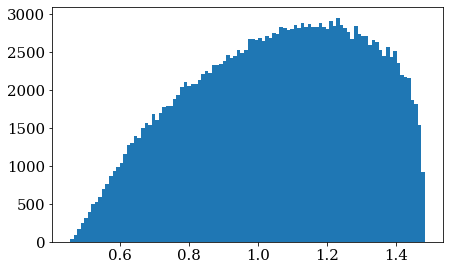

In [16]:
plt.hist(dfs_data[f"D_2pi"].e_q_pt, bins=100)

In [17]:
for df in list(dfs_data.values())+list(dfs_trigger.values()):
    df['h1_px'] = df.eval(f'h1_p*sin(h1_th*{np.pi/180})*cos(h1_ph*{np.pi/180})')
    df['h1_py'] = df.eval(f'h1_p*sin(h1_th*{np.pi/180})*sin(h1_ph*{np.pi/180})')
    df['h1_pz'] = df.eval(f'h1_p*cos(h1_th*{np.pi/180})')

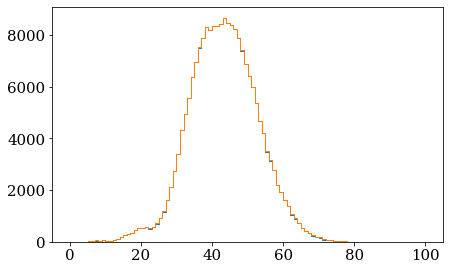

In [23]:
plt.hist(dfs_data[f"D_2pi"].eval("dtheta_epi1"),bins=100, range=(0,100), histtype=
         'step')
theta_epi=f"""arccos((e_px*h1_px+e_py*h1_py+e_pz*h1_pz)
                      /sqrt(e_px**2+e_py**2+e_pz**2)
                      /sqrt(h1_px**2+h1_py**2+h1_pz**2))*{180/np.pi}""".replace("\n", "")
plt.hist(dfs_data[f'D_2pi'].eval(theta_epi),bins=100, range=(0,100), histtype=
         'step')
plt.show()

In [19]:
for df in list(dfs_data.values())+list(dfs_trigger.values()):
    theta_e="2*arcsin(sqrt(Q2/(4*5.014*(5.014-nu))))"
    theta_qe=f"arctan((5.014-nu)*sin({theta_e})/(5.014-(5.014-nu)*cos({theta_e})))+{theta_e}"
    e_pz = f"((5.014-nu)*cos(theta_qe))"
    e_pt = f"((5.014-nu)*sin(theta_qe))"
    
    h1_pz= "sqrt(h1_p**2-h1_cm_pt**2)*(2*(h1_rap>0)-1)"
    yvars = [f"sqrt((sqrt(e_q_pz**2+e_q_pt**2+{m}**2)+sqrt({h1_pz}**2+h1_cm_pt**2+{m}**2))**2- (e_q_pz+{h1_pz})**2-(h1_cm_pt**2+e_q_pt**2+2*h1_cm_pt*cos(h1_cm_ph)*e_q_pt))"\
             for m in (0.000511, 0.1396)]
    theta_e="2*arcsin(sqrt(Q2/(4*5.014*(5.014-nu))))"
    theta_qe=f"arctan((5.014-nu)*sin({theta_e})/(5.014-(5.014-nu)*cos({theta_e})))+{theta_e}"
    e_q_pz = f"((5.014-nu)*cos(theta_qe))"
    e_q_pt = f"((5.014-nu)*sin(theta_qe))"
    df['theta_e'] = df.eval(theta_e)
    df['theta_qe'] = df.eval(theta_qe)
    df['e_q_pz'] = df.eval(e_q_pz)
    df['e_q_pt'] = df.eval(e_q_pt)
    df['h1_px'] = df.eval(f'h1_p*sin(h1_th*{np.pi/180})*cos(h1_ph*{np.pi/180})')
    df['h1_py'] = df.eval(f'h1_p*sin(h1_th*{np.pi/180})*sin(h1_ph*{np.pi/180})')
    df['h1_pz'] = df.eval(f'h1_p*cos(h1_th*{np.pi/180})')
    

sqrt((sqrt(0.000511**2+h1_p**2)+sqrt(0.000511**2+e_p**2))**2-(h1_px+e_px)**2-(h1_py+e_py)**2-(h1_pz+e_pz)**2)


<ipython-input-20-b63ac9eb335f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['theta_e'] = df.eval(theta_e)
<ipython-input-20-b63ac9eb335f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['theta_qe'] = df.eval(theta_qe)
<ipython-input-20-b63ac9eb335f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/inde

sqrt((sqrt(0.000511**2+h1_p**2)+sqrt(0.000511**2+e_p**2))**2-(h1_px+e_px)**2-(h1_py+e_py)**2-(h1_pz+e_pz)**2)


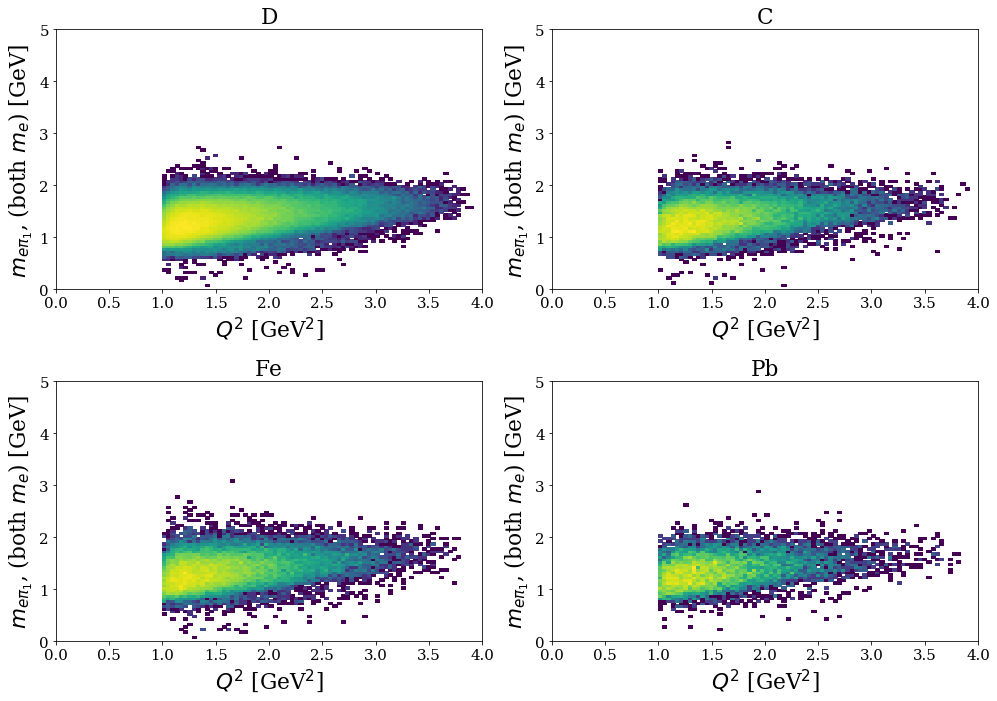

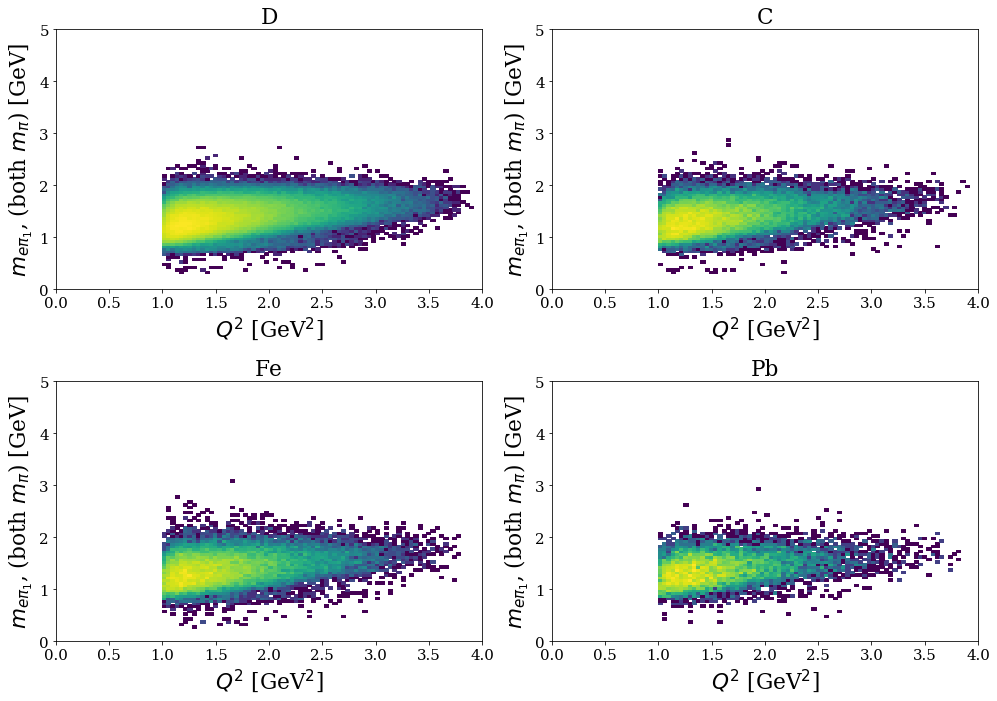

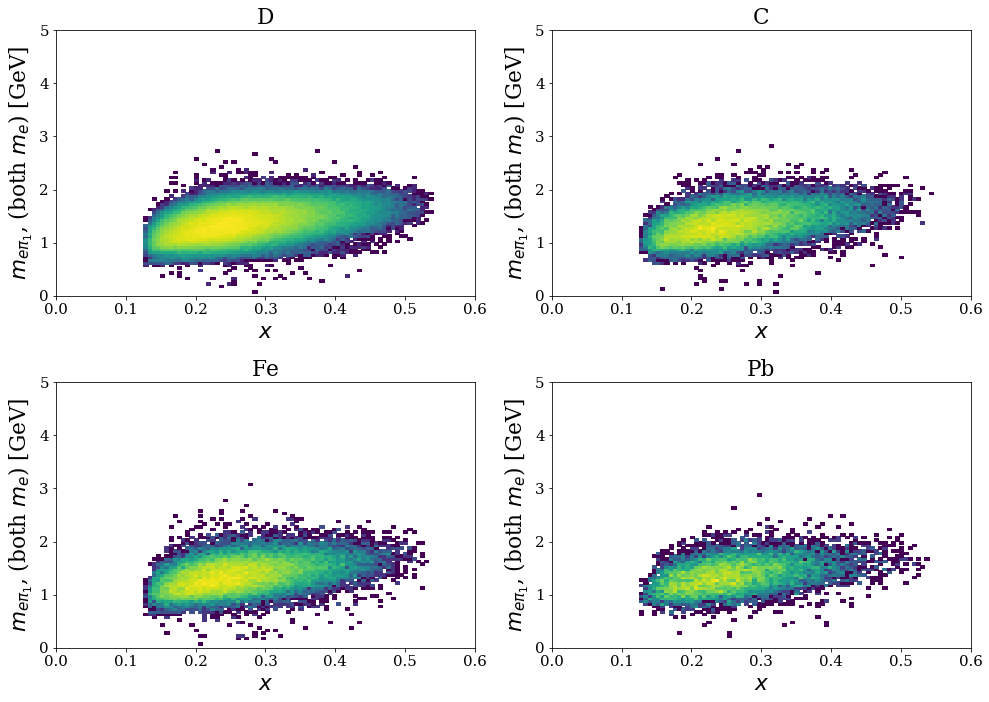

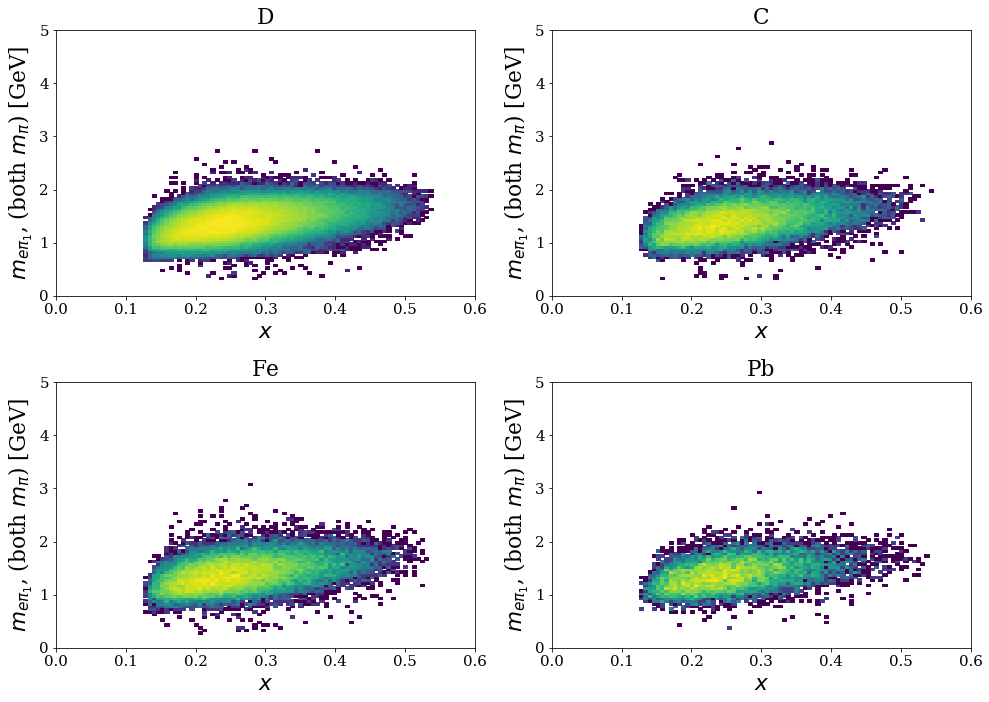

In [20]:
for xvar,xvar_latex in "Q2,$Q^2$ [GeV$^2$]".split(","), "x $x$".split():
    theta_e="2*arcsin(sqrt(Q2/(4*5.014*(5.014-nu))))"
    theta_qe=f"arctan((5.014-nu)*sin({theta_e})/(5.014-(5.014-nu)*cos({theta_e})))+{theta_e}"
    e_pz = f"((5.014-nu)*cos(theta_qe))"
    e_pt = f"((5.014-nu)*sin(theta_qe))"
    
    #h1_pz= "(h1_p*sinh(h1_rap))"
    yvars = [f"sqrt((sqrt(e_q_pz**2+e_q_pt**2+{m}**2)+sqrt({h1_pz}**2+h1_cm_pt**2+{m}**2))**2- (e_q_pz+{h1_pz})**2-(h1_cm_pt**2+e_q_pt**2+2*h1_cm_pt*cos(h1_cm_ph)*e_q_pt))"\
             for m in (0.000511, 0.1396)]
     
    yvars = [f'sqrt((sqrt({mass}**2+h1_p**2)+sqrt({mass}**2+e_p**2))**2-(h1_px+e_px)**2-(h1_py+e_py)**2-(h1_pz+e_pz)**2)'\
         for mass in (0.000511, 0.1396)]
    print(yvars[0])
    tags = "assuming_electron_mass assuming_pion_mass".split()
    lbls = "$m_{e}$ $m_{\\pi}$".split()
    for tag, yvar,lbl in zip(tags, yvars,lbls):
        
        fig,axs = plt.subplots(2,2, figsize=(14,10))
        for i, a in enumerate("D C Fe Pb".split()):
            plt.sca(axs[i//2][i%2])
            df = dfs_data[f"{a}_2pi"].query("dtheta_epi1>25")
            df['theta_e'] = df.eval(theta_e)
            df['theta_qe'] = df.eval(theta_qe)
            df['e_q_pz'] = df.eval(e_pz)
            df['e_q_pt'] = df.eval(e_pt)
            df[f'yvar']=df.eval(yvar)
            plt.hist2d(df.eval(xvar), df.eval(yvar), bins=100, norm = mpl.colors.LogNorm(),
                       range=((0,4 if xvar=="Q2" else 0.6),(0,5)))
            plt.gca().set_ylabel(f"$m_{{e\\pi_1}}$, (both {lbl}) [GeV]")
            plt.gca().set_xlabel(xvar_latex)
            plt.gca().set_title(a)
        fig.tight_layout()
        fig.savefig(f"images/{xvar}_vs_pair_masses_{tag}.png")

<ipython-input-65-a7c49903b5e2>:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  plt.hist(dfs_trigger['D'].query("h1_pid>0").query(q).eval(yvars[0]),
<ipython-input-65-a7c49903b5e2>:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  plt.hist(dfs_trigger['D'].query("h1_pid<0").query(q).eval(yvars[0]),


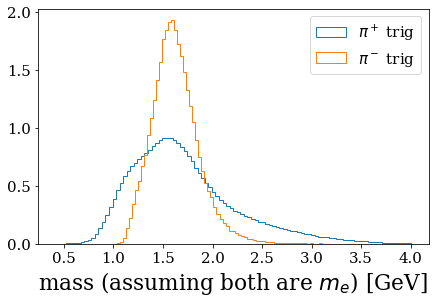

In [65]:
q=f"{yvars[0]}<4"
plt.hist(dfs_trigger['D'].query("h1_pid>0").query(q).eval(yvars[0]),
         bins=100, normed=True,label='$\\pi^+$ trig',histtype='step')
plt.hist(dfs_trigger['D'].query("h1_pid<0").query(q).eval(yvars[0]), 
         bins=100, normed=True,label='$\\pi^-$ trig',histtype='step')
plt.gca().set_xlabel("mass (assuming both are $m_e$) [GeV]")
plt.legend()
plt.show()


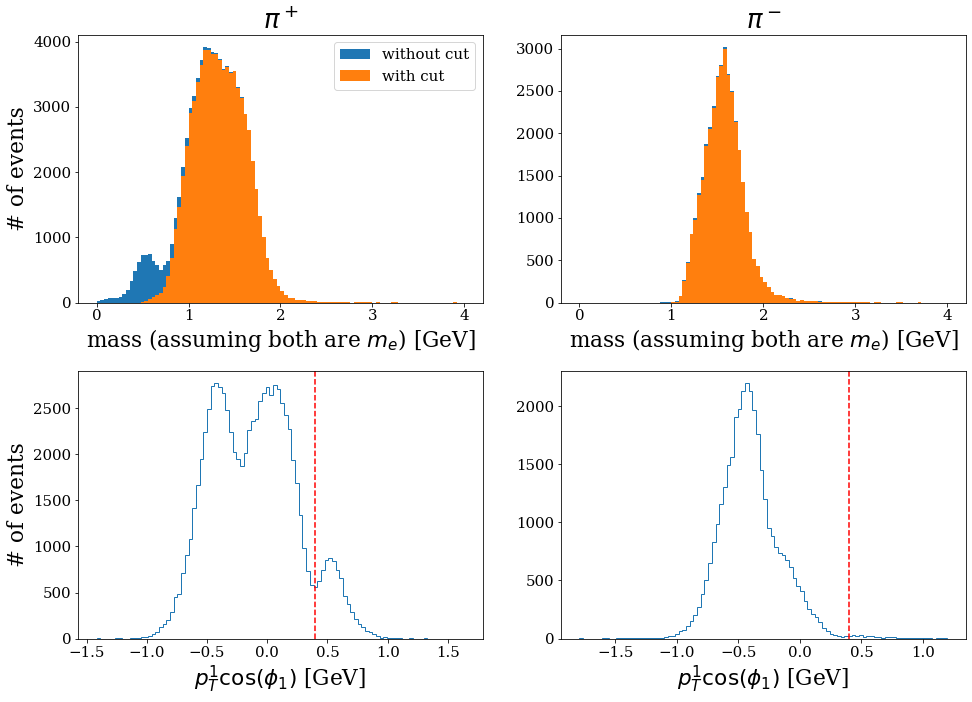

In [25]:
q="h1_cm_pt*cos(h1_cm_ph)<0.4"
fig, axs = plt.subplots(2,2, figsize=(14,10))
plt.sca(axs[0][0])
plt.hist(dfs_data['D_2pi'].query('h1_pid>0').eval(yvars[0]),
         bins=100, label='without cut',range=(0,4))
plt.hist(dfs_data['D_2pi'].query('h1_pid>0').query(q).eval(yvars[0]), 
         bins=100,label='with cut',range=(0,4))
plt.gca().set_xlabel("mass (assuming both are $m_e$) [GeV]")
plt.gca().set_title('$\pi^+$',size='xx-large')
plt.legend()
plt.sca(axs[0][1])
plt.hist(dfs_data['D_2pi'].query('h1_pid<0').eval(yvars[0]),
         bins=100, label='without cut',range=(0,4))
plt.hist(dfs_data['D_2pi'].query('h1_pid<0').query(q).eval(yvars[0]), 
         bins=100,label='with cut',range=(0,4))
plt.gca().set_xlabel("mass (assuming both are $m_e$) [GeV]")
plt.gca().set_title('$\pi^-$',size='xx-large')

plt.sca(axs[1][0])
plt.hist(dfs_data['D_2pi'].query("h1_pid>0").eval("h1_cm_pt*cos(h1_cm_ph)"),
         bins=100,label='$\\pi^+$',histtype='step')
plt.axvline(0.4, color='r', linestyle='--')
plt.gca().set_xlabel("$p^1_T\\cos(\\phi_1)$ [GeV]")
plt.sca(axs[1][1])
plt.hist(dfs_data['D_2pi'].query("h1_pid<0").eval("h1_cm_pt*cos(h1_cm_ph)"), 
         bins=100,label='$\\pi^-$',histtype='step')
plt.gca().set_xlabel("$p^1_T\\cos(\\phi_1)$ [GeV]")
plt.axvline(0.4, color='r', linestyle='--')

axs[0][0].set_ylabel("# of events")
axs[1][0].set_ylabel("# of events")
#os.mkdir("images/ptcosphi/")
fig.tight_layout()
fig.savefig("images/ptcosphi/ptcosphi_before_after.png")
plt.show()

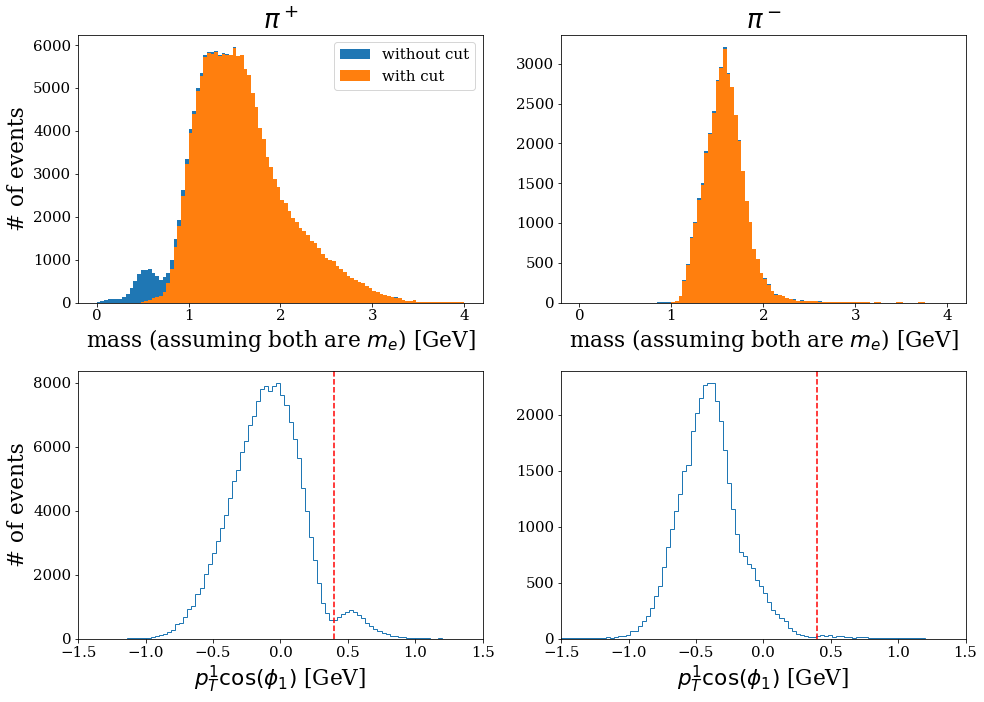

In [22]:
df = dfs_data['D'].query("""h1_pid*h2_pid==-211**2 and (h1_p+h2_p)/nu<1.0 
                          and h2_p>0.2 and h2_p<5.0
                          and  h1_p>0.2 and h1_p<5.0""".replace("\n", " ")).query(R2h_module.pair_cut_nom)
q="h1_cm_pt*cos(h1_cm_ph)<0.4"
fig, axs = plt.subplots(2,2, figsize=(14,10),sharex='row')
plt.sca(axs[0][0])
plt.hist(df.query('h1_pid>0').eval(yvars[0]),
         bins=100, label='without cut',range=(0,4))
plt.hist(df.query('h1_pid>0').query(q).eval(yvars[0]), 
         bins=100,label='with cut',range=(0,4))
plt.gca().set_xlabel("mass (assuming both are $m_e$) [GeV]")
plt.gca().set_title('$\pi^+$',size='xx-large')
plt.legend()
plt.sca(axs[0][1])
plt.hist(df.query('h1_pid<0').eval(yvars[0]),
         bins=100, label='without cut',range=(0,4))
plt.hist(df.query('h1_pid<0').query(q).eval(yvars[0]), 
         bins=100,label='with cut',range=(0,4))
plt.gca().set_xlabel("mass (assuming both are $m_e$) [GeV]")
plt.gca().set_title('$\pi^-$',size='xx-large')

plt.sca(axs[1][0])
plt.hist(df.query("h1_pid>0").eval("h1_cm_pt*cos(h1_cm_ph)"),
         bins=100,label='$\\pi^+$',histtype='step', range=(-1.5,1.5))
plt.axvline(0.4, color='r', linestyle='--')
plt.gca().set_xlabel("$p^1_T\\cos(\\phi_1)$ [GeV]")
plt.sca(axs[1][1])
plt.hist(df.query("h1_pid<0").eval("h1_cm_pt*cos(h1_cm_ph)"), 
         bins=100,label='$\\pi^-$',histtype='step', range=(-1.5,1.5))
plt.gca().set_xlabel("$p^1_T\\cos(\\phi_1)$ [GeV]")
plt.axvline(0.4, color='r', linestyle='--')

axs[0][0].set_ylabel("# of events")
axs[1][0].set_ylabel("# of events")
axs[1][0].set_xlim(-1.5,1.5)
#os.mkdir("images/ptcosphi/")
fig.tight_layout()
fig.savefig("images/ptcosphi/ptcosphi_before_after.png")
plt.show()

In [15]:
directory = "."
df= pd.concat([root_pandas.read_root(f"Data_Pairs_%s.root" %a.replace("D_",""),a) for a in "D_C C D_Fe Fe Pb D_Pb".split()])

In [18]:
R2h_module.applyCutsPair(df)

df = df.query("""Q2>1 and nu> 2.3 and nu< 4.2 and h1_pid*h2_pid==-211**2 and (h1_p+h2_p)/nu<1.0 
                          and h2_p>0.2 and h2_p<5.0
                          and  h1_p>0.2 and h1_p<5.0
                          and h1_th> 10 and h2_th>10
                          and (h2_pid>0) | (h2_pid==-211 & h2_th>25 & (h2_p>0.5 | h2_th>40))
                          and (h1_pid>0) | (h1_pid==-211 & h1_th>25 & (h1_p>0.5 | h1_th>40))"""\
              .replace("\n", " ")).query(R2h_module.pair_cut_nom)
df['h1_px'] = df.eval(f'h1_p*cos(h1_ph*{np.pi/180})*sin(h1_th*{np.pi/180})')
df['h1_py'] = df.eval(f'h1_p*sin(h1_ph*{np.pi/180})*sin(h1_th*{np.pi/180})')
df['h1_pz'] = df.eval(f'h1_p*cos(h1_th*{np.pi/180})')

#plt.hist(df.eval(f"{theta_e}-e_th"),bins=100)



#h1_pz= "(sqrt(h1_cm_pt**2+.1396**2)*sinh(h1_rap))"

h1_pz= "sqrt(h1_p**2-h1_cm_pt**2)*(2*(h1_rap>0)-1)"

theta_e="2*arcsin(sqrt(Q2/(4*5.014*(5.014-nu))))"
theta_q=f'arctan2((5.014-nu)*sin({theta_e}),(5.014-(5.014-nu)*cos({theta_e})))'
theta_qe=f"{theta_q}+{theta_e}"
e_pz = f"((5.014-nu)*cos(theta_qe))"
e_pt = f"((5.014-nu)*sin(theta_qe))"
df['theta_e'] = df.eval(theta_e)
df['theta_qe'] = df.eval(theta_qe)
df['e_q_pz'] = df.eval(e_pz)
df['e_q_pt'] = df.eval(e_pt)
dtheta_epi1=f"""arccos((e_px*h1_px+e_py*h1_py+e_pz*h1_pz)
                      /sqrt(e_px**2+e_py**2+e_pz**2)
                      /sqrt(h1_px**2+h1_py**2+h1_pz**2))*{180/np.pi}""".replace("\n", "")

df['dtheta_epi1_vpo']  = df.eval(f"arccos((cos(theta_qe)*{h1_pz}+sin(theta_qe)*h1_cm_pt*cos(h1_cm_ph))/h1_p)*{180/np.pi}")
df['dtheta_epi1']  = df.eval(dtheta_epi1)


#yvars = [f"sqrt((sqrt(e_q_pz**2+e_q_pt**2+{m}**2)+sqrt({h1_pz}**2+h1_cm_pt**2+{m}**2))**2- (e_q_pz+{h1_pz})**2-(h1_cm_pt**2+e_q_pt**2+2*h1_cm_pt*cos(h1_cm_ph)*e_q_pt))"\
#         for m in (0.000511, 0.1396)]
yvars = [f'sqrt((sqrt({mass}**2+h1_p**2)+sqrt({mass}**2+e_p**2))**2-(h1_px+e_px)**2-(h1_py+e_py)**2-(h1_pz+e_pz)**2)'\
         for mass in (0.000511, 0.1057, 0.1396)]
df['mass_epi1'] =df.eval(yvars[0])

print(df.columns)

Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1251783  (100.00  %)
2.2 < nu < 4.2 1237513  (98.86  %)
secondary hadrons are pions 1188869  (96.07  %)
(h1_p+h2_p)/nu<1.0 1188869  (100.00  %)
(h1_pid*h2_pid)<0, opposite charge pions 1187408  (99.88  %)
kinematic limits for h2_z 1183534  (99.67  %)
kinematic limits for dphi 1182474  (99.91  %)
kinematic limits for pair_mass 1083061  (91.59  %)
leading hadrons are pions 282840  (26.11  %)
0.2<h2_p<5.0 282840  (100.00  %)
0.2<h1_p<5.0 282840  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 165248  (58.42  %)
10<h2_th 165248  (100.00  %)
Theta/P fiducial region selected for secondary hadron 165248  (100.00  %)
10< h1_th 165248  (100.00  %)
Theta/P fiducial region selected for trigger hadron 165248  (100.00  %)
Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_

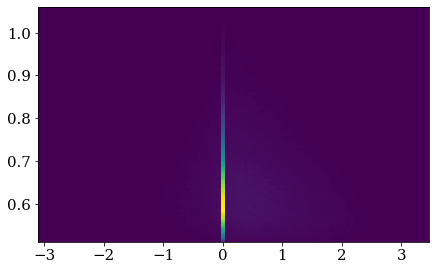

In [20]:
theta_epi=f"""arccos((e_px*h1_px+e_py*h1_py+e_pz*h1_pz)
                      /sqrt(e_px**2+e_py**2+e_pz**2)
                      /sqrt(h1_px**2+h1_py**2+h1_pz**2))*{180/np.pi}""".replace("\n", "")
    #theta_epi=f'dtheta_epi1-{theta_epi}'
plt.hist2d(df.query("h1_rap>0").eval("dtheta_epi1-dtheta_epi1_vpo"), df.query("h1_rap>0").theta_qe, bins=100)
plt.show()

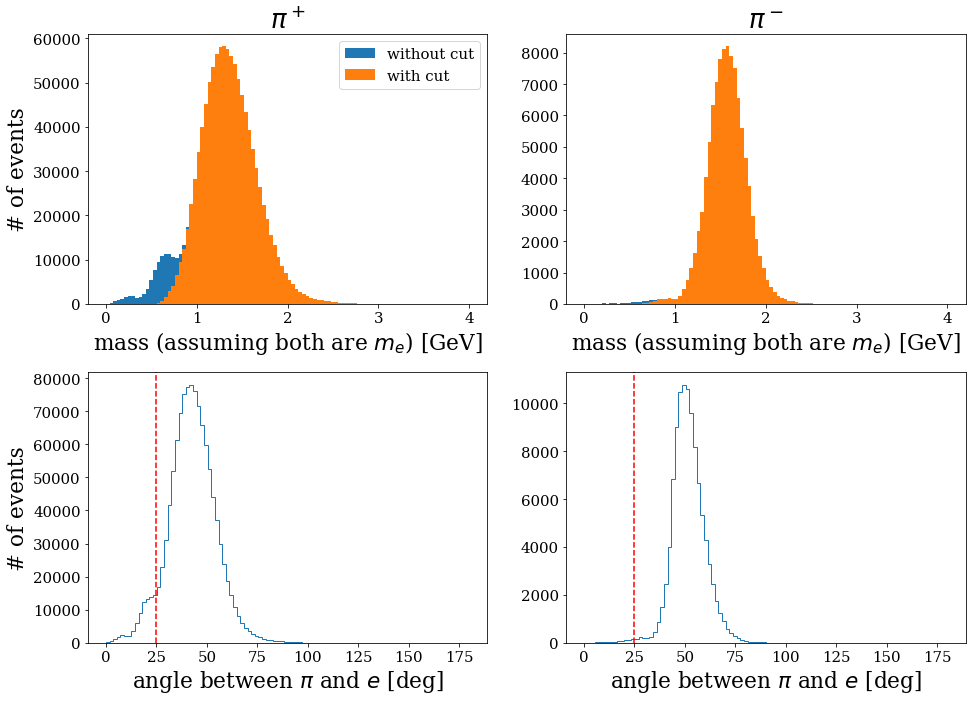

In [153]:
q= "dtheta_epi1>25"
fig, axs = plt.subplots(2,2, figsize=(14,10),sharex='row')
plt.sca(axs[0][0])
plt.hist(df.query('h1_pid>0').eval(yvars[0]),
         bins=100, label='without cut',range=(0,4))
plt.hist(df.query('h1_pid>0').query(q).eval(yvars[0]), 
         bins=100,label='with cut',range=(0,4))
plt.gca().set_xlabel("mass (assuming both are $m_e$) [GeV]")
plt.gca().set_title('$\pi^+$',size='xx-large')
plt.legend()
plt.sca(axs[0][1])
plt.hist(df.query('h1_pid<0').eval(yvars[0]),
         bins=100, label='without cut',range=(0,4))
plt.hist(df.query('h1_pid<0').query(q).eval(yvars[0]), 
         bins=100,label='with cut',range=(0,4))
plt.gca().set_xlabel("mass (assuming both are $m_e$) [GeV]")
plt.gca().set_title('$\pi^-$',size='xx-large')

plt.sca(axs[1][0])
plt.hist(df.query("h1_pid>0").eval("dtheta_epi1"),
         bins=100,label='$\\pi^+$',histtype='step', range=(0,180))
plt.axvline(25, color='r', linestyle='--')
plt.gca().set_xlabel("angle between $\pi$ and $e$ [deg]")
plt.sca(axs[1][1])
plt.hist(df.query("h1_pid<0").eval("dtheta_epi1"), 
         bins=100,label='$\\pi^-$',histtype='step', range=(0,180))
plt.gca().set_xlabel("angle between $\pi$ and $e$ [deg]")
plt.axvline(25, color='r', linestyle='--')

axs[0][0].set_ylabel("# of events")
axs[1][0].set_ylabel("# of events")
#axs[1][0].set_xlim(-1.5,1.5)
#os.mkdir("images/ptcosphi/")
fig.tight_layout()
fig.savefig("images/ptcosphi/ptcosphi_before_after.png")
plt.show()

In [147]:
def xxx(q="h1_cm_pt*cos(h1_cm_ph)<0.4",tag="px"):
    fig, axs = plt.subplots(3,2, figsize=(14,15),sharex='row')
    plt.sca(axs[0][0])
    plt.hist(df.query('h1_pid>0').eval(yvars[0]),
             bins=100, label='without cut',range=(0,4))
    plt.hist(df.query('h1_pid>0').query(q).eval(yvars[0]), 
             bins=100,label='with cut',range=(0,4))
    plt.gca().set_xlabel("mass (assuming both are $m_e$) [GeV]")
    plt.gca().set_title('$\pi^+$',size='xx-large')
    plt.legend()
    plt.sca(axs[0][1])
    plt.hist(df.query('h1_pid<0').eval(yvars[0]),
             bins=100, label='without cut',range=(0,4))
    plt.hist(df.query('h1_pid<0').query(q).eval(yvars[0]), 
             bins=100,label='with cut',range=(0,4))
    plt.gca().set_xlabel("mass (assuming both are $m_e$) [GeV]")
    plt.gca().set_title('$\pi^-$',size='xx-large')



    theta_epi=f"""arccos((e_px*h1_px+e_py*h1_py+e_pz*h1_pz)
                      /sqrt(e_px**2+e_py**2+e_pz**2)
                      /sqrt(h1_px**2+h1_py**2+h1_pz**2))*{180/np.pi}""".replace("\n", "")
    #theta_epi=f'dtheta_epi1-{theta_epi}'
    plt.sca(axs[1][0])
    plt.hist(df.query('h1_pid>0').eval(theta_epi),
             bins=100, label='without cut',range=(0,180))
    plt.hist(df.query('h1_pid>0').query(q).eval(theta_epi), 
             bins=100,label='with cut',range=(0,180))
    plt.gca().set_xlabel("angle between e and $\pi_1$ [deg]")
    plt.gca().set_title('$\pi^+$',size='xx-large')
    plt.legend()
    plt.sca(axs[1][1])
    plt.hist(df.query('h1_pid<0').eval(theta_epi),
             bins=200, label='without cut',range=(0,180))
    plt.hist(df.query('h1_pid<0').query(q).eval(theta_epi), 
             bins=200,label='with cut',range=(0,180))
    plt.gca().set_xlabel("angle between e and $\pi_1$ [deg]")
    plt.gca().set_title('$\pi^-$',size='xx-large')
    plt.sca(axs[2][0])
    plt.hist(df.query("h1_pid>0").eval("h1_cm_pt*cos(h1_cm_ph)"),
             bins=200,label='$\\pi^+$', range=(-1.5,1.5))
    plt.hist(df.query(q).query("h1_pid>0").eval("h1_cm_pt*cos(h1_cm_ph)"),
             bins=200,label='$\\pi^+$', range=(-1.5,1.5))
    #plt.axvline(0.4, color='r', linestyle='--')
    plt.gca().set_xlabel("$p^1_T\\cos(\\phi_1)$ [GeV]")
    plt.sca(axs[2][1])
    plt.hist(df.query("h1_pid<0").eval("h1_cm_pt*cos(h1_cm_ph)"), 
             bins=200,label='$\\pi^-$', range=(-1.5,1.5))
    plt.hist(df.query(q).query("h1_pid<0").eval("h1_cm_pt*cos(h1_cm_ph)"),
             bins=200,label='$\\pi^+$', range=(-1.5,1.5))
    plt.gca().set_xlabel("$p^1_T\\cos(\\phi_1)$ [GeV]")
    #plt.axvline(0.4, color='r', linestyle='--')

    axs[0][0].set_ylabel("# of events")
    axs[1][0].set_ylabel("# of events")
    axs[2][0].set_ylabel("# of events")
    axs[1][0].set_xlim(0,180)
    axs[2][0].set_xlim(-1.5,1.5)
    #os.mkdir("images/ptcosphi/")
    fig.tight_layout()
    fig.savefig(f"images/ptcosphi/low_mass_before_after_{tag}.png")
    plt.show()

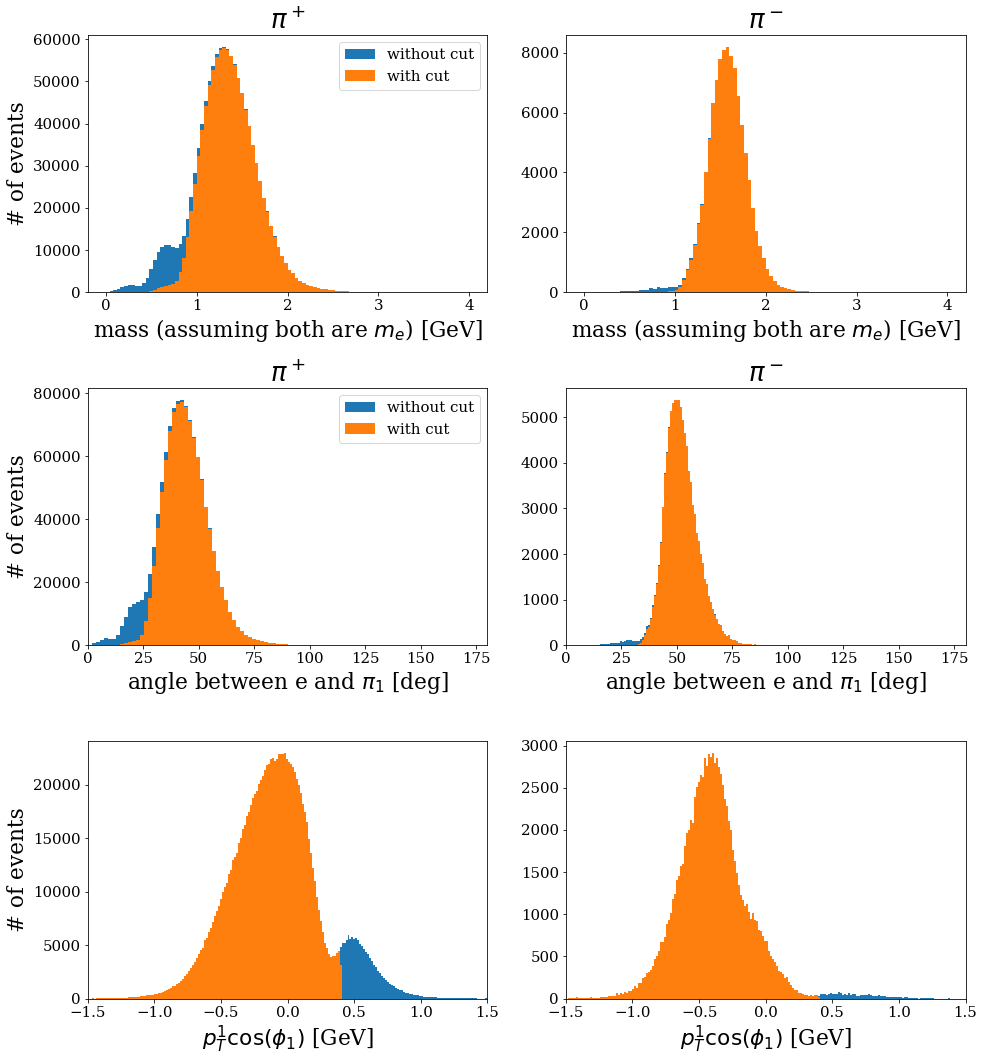

In [148]:
xxx()

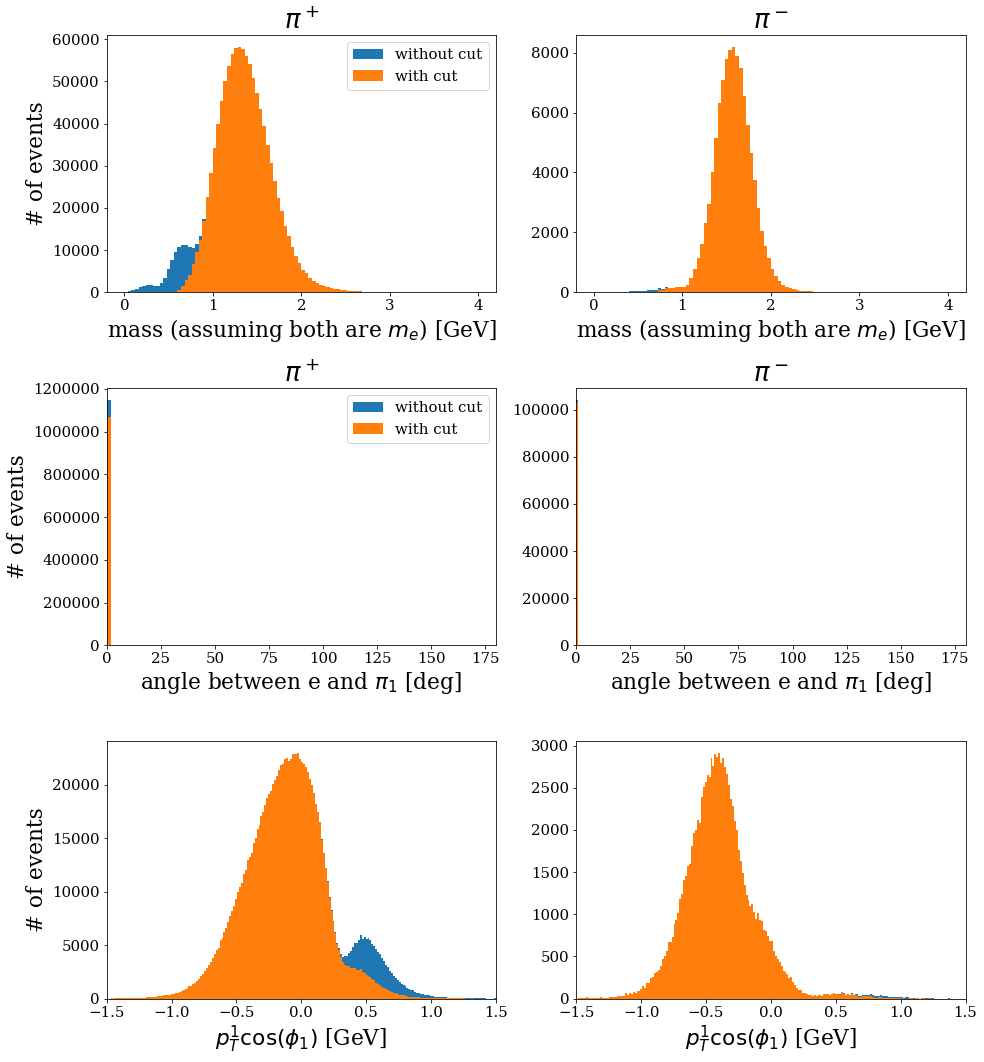

In [146]:

xxx("dtheta_epi1>25", "thetaepi1_cut")


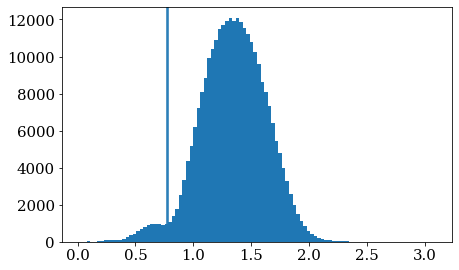

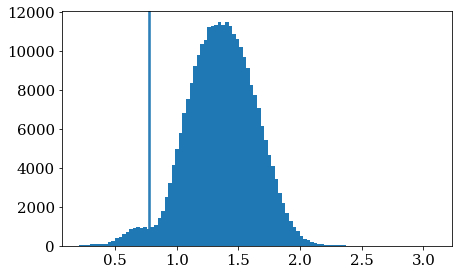

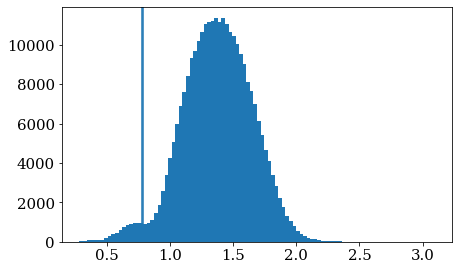

In [141]:
plt.hist(df.eval(yvars[0]),bins=100)
plt.axvline(.77526)
plt.axvline(.78265)
plt.show()
plt.hist(df.eval(yvars[1]),bins=100)
plt.axvline(.77526)
plt.axvline(.78265)
plt.show()
plt.hist(df.eval(yvars[2]),bins=100)
plt.axvline(.77526)
plt.axvline(.78265)
plt.show()

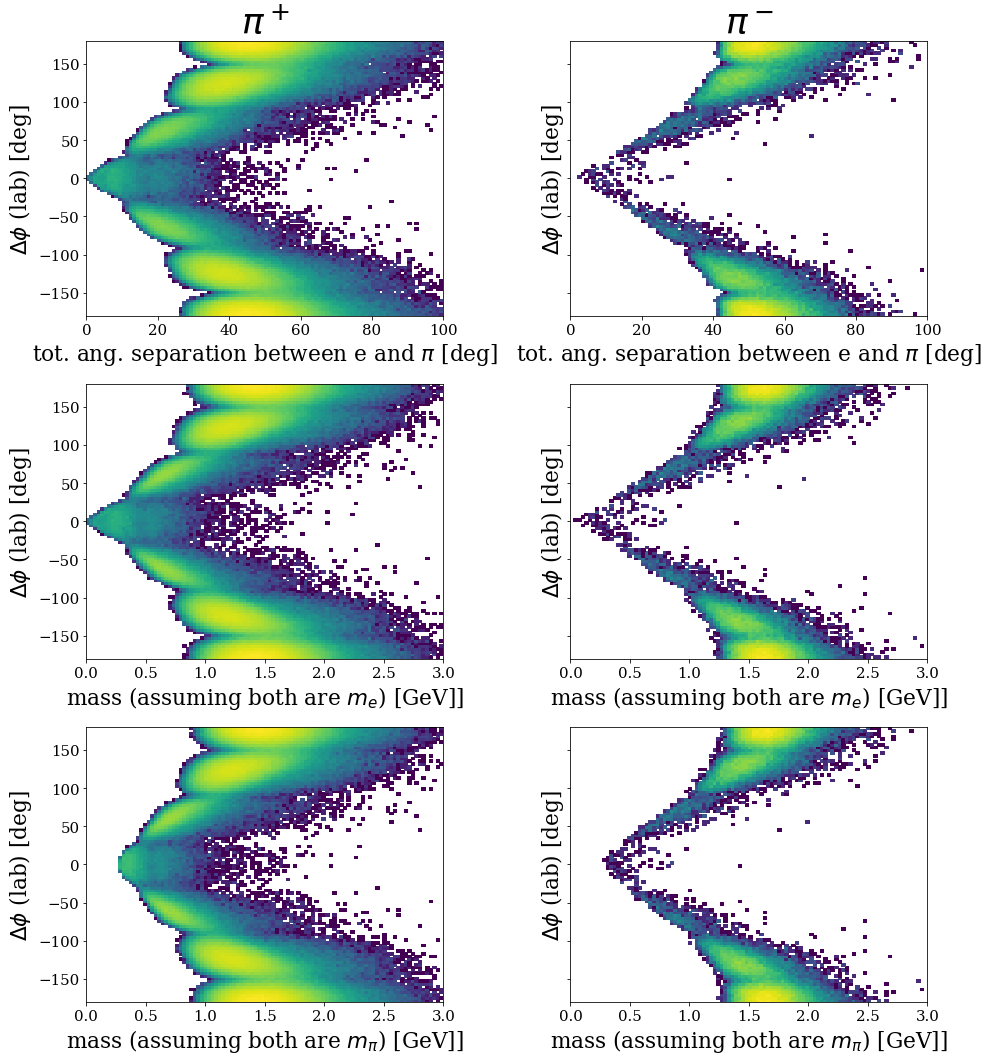

In [38]:
yvars = [f'sqrt((sqrt({mass}**2+h1_p**2)+sqrt({mass}**2+e_p**2))**2-(h1_px+e_px)**2-(h1_py+e_py)**2-(h1_pz+e_pz)**2)'\
         for mass in (0.000511, 0.1396)]
theta_epi_str=f"""arccos((e_px*h1_px+e_py*h1_py+e_pz*h1_pz)
                      /sqrt(e_px**2+e_py**2+e_pz**2)
                      /sqrt(h1_px**2+h1_py**2+h1_pz**2))*{180/np.pi}""".replace("\n", "")
fig, axs = plt.subplots(3,2, figsize=(14,15),sharex='row', sharey='all')

for i, label,gtlt in [(0,'$\pi^+$','>'),(1,'$\pi^-$','<')]:
    plt.sca(axs[0][i])
    plt.title(label, fontsize=36)
    plt.hist2d(df.query(f'h1_pid{gtlt}0').eval(theta_epi_str),
               df.query(f'h1_pid{gtlt}0').
               eval(f"h1_ph-e_ph*{180/np.pi}+360*(h1_ph-e_ph*{180/np.pi}<-180)-360*(h1_ph-e_ph*{180/np.pi}>180)"),
               bins=100,norm=mpl.colors.LogNorm(),range=((0,100),(-180,180)))
    plt.xlabel('tot. ang. separation between e and $\pi$ [deg]')
    plt.ylabel('$\Delta\phi$ (lab) [deg]')



for i, label,gtlt in [(0,'$\pi^+$','>'),(1,'$\pi^-$','<')]:
    plt.sca(axs[1][i])
    plt.hist2d(df.query(f'h1_pid{gtlt}0').eval(yvars[0]),
               df.query(f'h1_pid{gtlt}0').
               eval(f"h1_ph-e_ph*{180/np.pi}+360*(h1_ph-e_ph*{180/np.pi}<-180)-360*(h1_ph-e_ph*{180/np.pi}>180)"),
               bins=100,norm=mpl.colors.LogNorm(),range=((0,3),(-180,180)))
    plt.xlabel('mass (assuming both are $m_e$) [GeV]]')
    plt.ylabel('$\Delta\phi$ (lab) [deg]')

for i, label,gtlt in [(0,'$\pi^+$','>'),(1,'$\pi^-$','<')]:
    plt.sca(axs[2][i])
    plt.hist2d(df.query(f'h1_pid{gtlt}0').eval(yvars[1]),
               df.query(f'h1_pid{gtlt}0').
               eval(f"h1_ph-e_ph*{180/np.pi}+360*(h1_ph-e_ph*{180/np.pi}<-180)-360*(h1_ph-e_ph*{180/np.pi}>180)"),
               bins=100,norm=mpl.colors.LogNorm(),range=((0,3),(-180,180)))
    plt.xlabel('mass (assuming both are $m_\pi$) [GeV]]')
    plt.ylabel('$\Delta\phi$ (lab) [deg]')
plt.tight_layout()
plt.show()

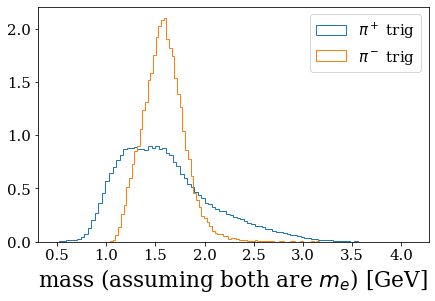

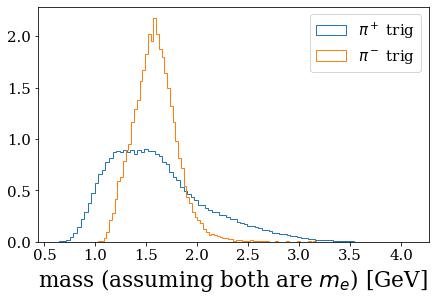

In [616]:
q="h1_cm_pt*cos(h1_cm_ph)<0.4"
plt.hist(dfs_data['D_2pi'].query("h1_pid>0").query(q).eval(yvars[0]),
         bins=100, density=True,label='$\\pi^+$ trig',histtype='step')
plt.hist(dfs_data['D_2pi'].query("h1_pid<0").query(q).eval(yvars[0]), 
         bins=100, density=True,label='$\\pi^-$ trig',histtype='step')
plt.gca().set_xlabel("mass (assuming both are $m_e$) [GeV]")
plt.legend()
plt.show()

q=f"abs((h1_ph)*({np.pi}/180)-e_ph)>{np.pi/2} and abs((h1_ph)*({np.pi}/180)-e_ph-2*{np.pi})>{np.pi/2}"
plt.hist(dfs_data['D_2pi'].query("h1_pid>0").query(q).eval(yvars[0]),
         bins=100, density=True,label='$\\pi^+$ trig',histtype='step')
plt.hist(dfs_data['D_2pi'].query("h1_pid<0").query(q).eval(yvars[0]), 
         bins=100, density=True,label='$\\pi^-$ trig',histtype='step')
plt.gca().set_xlabel("mass (assuming both are $m_e$) [GeV]")
plt.legend()
plt.show()

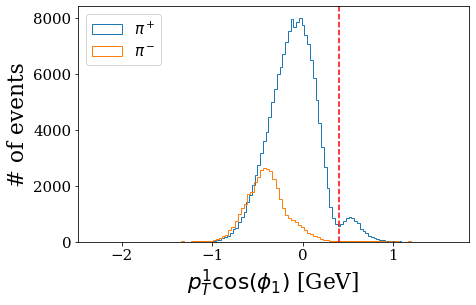

<ipython-input-642-468f1548d158>:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  plt.hist(dfs_data['D_2pi'].query("h2_pid>0").query(q).eval("h2_cm_pt*cos(h2_cm_ph)"),
<ipython-input-642-468f1548d158>:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  plt.hist(dfs_data['D_2pi'].query("h2_pid<0").query(q).eval("h2_cm_pt*cos(h2_cm_ph)"),


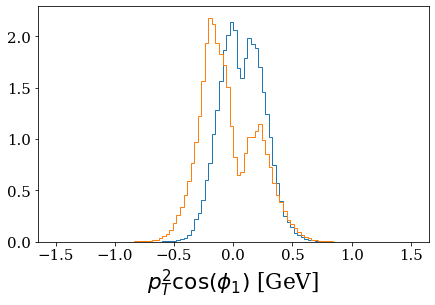

In [642]:
q="run==run"
plt.hist(dfs_data['D_2pi'].query("h1_pid>0").query(q).eval("h1_cm_pt*cos(h1_cm_ph)"),
         bins=100,label='$\\pi^+$',histtype='step')
plt.hist(dfs_data['D_2pi'].query("h1_pid<0").query(q).eval("h1_cm_pt*cos(h1_cm_ph)"), 
         bins=100,label='$\\pi^-$',histtype='step')
plt.axvline(0.4, color='r', linestyle='--')
plt.gca().set_xlabel("$p^1_T\\cos(\\phi_1)$ [GeV]")
plt.legend()
plt.gca().set_ylabel("# of events")
plt.savefig('images/ptcosphi/ptcosphi.png')
plt.show()


plt.hist(dfs_data['D_2pi'].query("h2_pid>0").query(q).eval("h2_cm_pt*cos(h2_cm_ph)"),
         bins=100, normed=True,label='$\\pi^+$ trig',histtype='step', range=(-1.5,1.5))
plt.hist(dfs_data['D_2pi'].query("h2_pid<0").query(q).eval("h2_cm_pt*cos(h2_cm_ph)"), 
         bins=100, normed=True,label='$\\pi^-$ trig',histtype='step', range=(-1.5,1.5))
plt.gca().set_xlabel("$p^2_T\\cos(\\phi_1)$ [GeV]")

plt.show()

In [ ]:
for xvar,xvar_latex in "W,$W$ [GeV]".split(","),:
    e_pz = f"(5.014-nu)"
    
    h1_pz="(h1_p*sinh(h1_rap))"
    yvars = [f"sqrt((sqrt({e_pz}**2+{0.000511}**2)+sqrt({h1_pz}**2+h1_cm_pt**2+{0.1396}**2))**2 - ({e_pz}+{h1_pz})**2-h1_cm_pt**2)"\
             ]
    tags = "assuming_electron_mass assuming_pion_mass".split()
    lbls = "$m_{e}$ $m_{\\pi}$".split()
    for tag, yvar,lbl in zip(tags, yvars,lbls):
        
        fig,axs = plt.subplots(2,2, figsize=(14,10))
        for i, a in enumerate("D C Fe Pb".split()):
            plt.sca(axs[i//2][i%2])
            df = dfs_data[f"{a}_2pi"]
            plt.hist2d(df.eval(xvar), df.eval(yvar), bins=100, norm = mpl.colors.LogNorm(),
                       range=((0,4 if xvar=="Q2" else 0.6),(0,3)))
            plt.gca().set_ylabel(f"$m_{{e\\pi_1}}$, (both {lbl}) [GeV]")
            plt.gca().set_xlabel(xvar_latex)
            plt.gca().set_title(a)
        fig.tight_layout()
        fig.savefig(f"images/wtf_{xvar}_vs_missing_mass_e_pi.png")

In [ ]:
print(dfs_data['D_2pi'].columns)

In [ ]:
fig,axs = plt.subplots(2,3, figsize=(14,8))
for i, a in enumerate("D_C D_Fe D_Pb C Fe Pb".split()):
    plt.sca(axs[i//3][i%3])
    runs = []
    rats = []
    for run in list(set(dfs_data[a].run)):
        ntr = len(dfs_trigger[a].query(f"run=={run}"))
        if ntr == 0:
            continue
        runs.append(run)
        rats.append(len(dfs_data[a+"_2pi"].query(f"run=={run}"))/\
                    ntr)
    plt.plot(runs, rats, marker='o', linestyle='')
    sigma = np.std(rats)
    mean = np.mean(rats)
    plt.gca().set_ylabel("$N_{2h}/N_h$")
    plt.gca().set_xlabel("run number")
    plt.gca().set_title(a)
    for rat,run in zip(rats,runs):
        if abs(rat-mean)/sigma>5:
            print("bad run: ", run)
fig.tight_layout()

In [ ]:
np.min(dfs_data["D_2pi"].eval("h2_cm_pt"))

In [ ]:
dfs_data['D_2pi'].columns

In [ ]:
plt.hist(dfs_data['D'].query("h1_p>2.7 and h1_pid>0 and h1_Chi2CC>0").h1_Chi2CC,bins=100,range=(0,0.5))
plt.hist(dfs_data['D'].query(f"h1_p>2.7 and h1_pid>0 and h1_Chi2CC>0 and {yvars[0]}<0.6").h1_Chi2CC,
         bins=100,range=(0,0.5))
plt.gca().set_xlabel("h1_Chi2CC")



 h2_z C
ntrigsA = 288708 ,  ntrigsD= 403416
ntrigsA = 295628 ,  ntrigsD= 411866
chi2 test
: chi2=8.897908
ndof=8
pval=0.350981

LEE test:
 largest normed residual =1.761286 at bin 4
local pval: 0.078190
global pval: 0.478648

signs test:
pval:  0.2890624999999999


 h2_z Fe
ntrigsA = 336373 ,  ntrigsD= 601457
ntrigsA = 345393 ,  ntrigsD= 614296
chi2 test
: chi2=15.728630
ndof=8
pval=0.046433
Failed chi2 test (p<0.05).  estimated systematic error: 0.00034189565739239464

LEE test:
 largest normed residual =3.188012 at bin 0
local pval: 0.001433
global pval: 0.011403

signs test:
pval:  0.5468749999999996


 h2_z Pb
ntrigsA = 121878 ,  ntrigsD= 626777
ntrigsA = 125298 ,  ntrigsD= 639925
chi2 test
: chi2=5.426649
ndof=8
pval=0.711152

LEE test:
 largest normed residual =1.637286 at bin 4
local pval: 0.101571
global pval: 0.575507

signs test:
pval:  0.2890624999999999


 pair_mass C
ntrigsA = 288708 ,  ntrigsD= 403416
ntrigsA = 295628 ,  ntrigsD= 411866
chi2 test
: chi2=10.560658
ndof=1

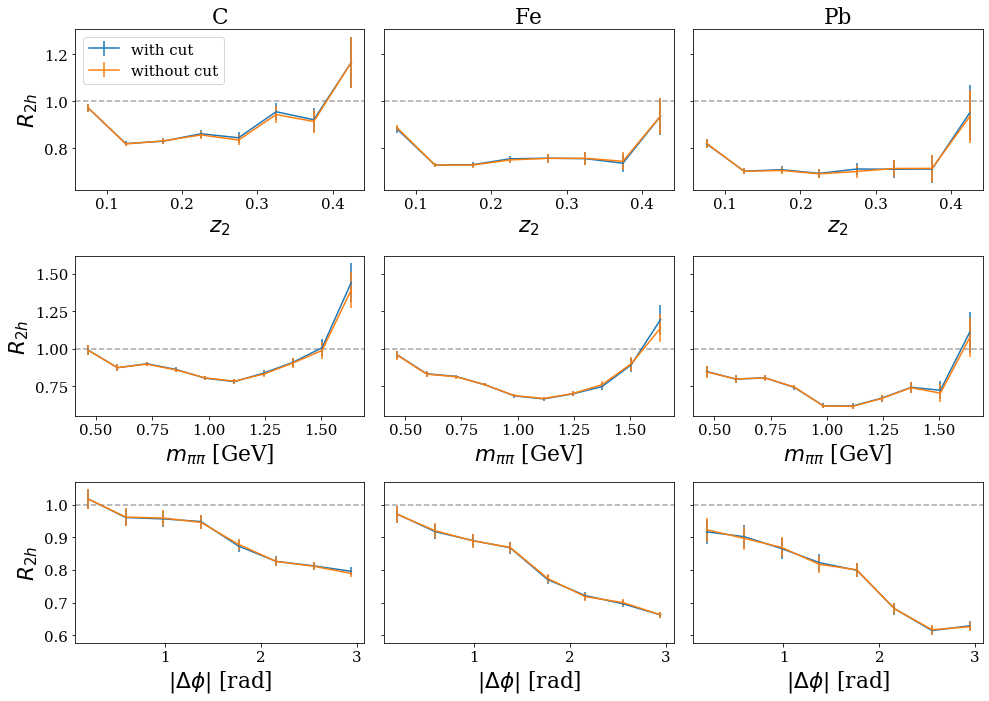

In [31]:
#check effect of pT1 * cos(phi1) cut
import syst_util
z2 = {"xvar":"h2_z", "bins":np.linspace(0.05,0.45,9)}
pair_mass = {"xvar":"pair_mass", "bins":np.linspace(0.4,1.7,11)}
dphi = {"xvar":"dphi", "bins":np.linspace(0,3.14,9)}
latex_names="$z_2$;$m_{\\pi\\pi}$ [GeV];$|\\Delta\\phi|$ [rad]".split(";")
fig,axs = plt.subplots(3,3, figsize=(14,10),sharey='row')
for i,xvar in enumerate([z2, pair_mass, dphi]):
    for j,A in enumerate("C Fe Pb".split()):
        q = "run != 420"#dummy expression
        df_A = dfs_data[A+"_2pi"].query(q)
        df_D = dfs_data["D_"+A+"_2pi"].query(q)
        df_triggers_A = dfs_trigger[A].query(q)
        df_triggers_D = dfs_trigger["D_"+A].query(q)
        print("\n\n",xvar['xvar'], A)
        
        df_res = []
        labels="with cut","without cut"
        for q,qtrig in [(f"dtheta_epi1>25",f"dtheta_epi1>25"),
                           (f"h1_cm_pt==h1_cm_pt",f"h1_cm_pt==h1_cm_pt")]:
        #for q,qtrig in []
            df_res.append(get_df_R2h(df_A,df_D,df_triggers_A,df_triggers_D,
                                  fig=None,**xvar,
                                   query=q,trigger_query=qtrig))
        syst_util.check_for_equality_of_dfs(df_res[0],df_res[1],printInfo=1,tightVsLoose=True)
        plt.sca(axs[i][j])
        plt.axhline(1, color='0.5', alpha=0.7, linestyle='--')
        plt.gca().set_xlabel(latex_names[i])
        plt.errorbar(df_res[0].x,df_res[0].y,df_res[0].dy,label=labels[0])
        plt.errorbar(df_res[1].x+.1*(df_res[1].x[0]-df_res[1].x[0]),df_res[1].y,df_res[1].dy,label=labels[1])
        axs[0][j].set_title(A)
axs[0][0].legend()
for i in range(3):
    axs[i][0].set_ylabel("$R_{2h}$")
plt.tight_layout()
#os.mkdir("images/ptcosphi/")
fig.savefig("images/ptcosphi/syst_ptcosphi.png")

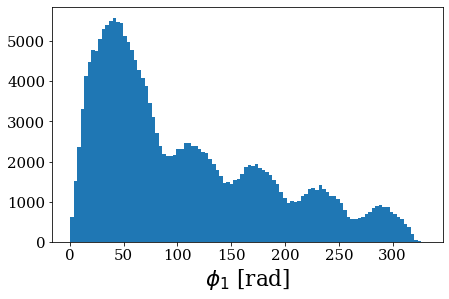

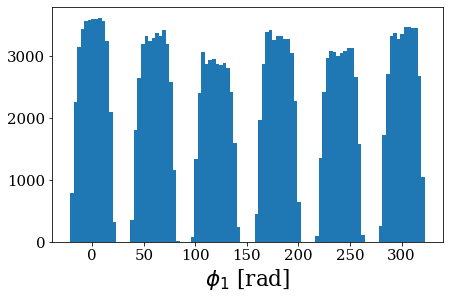

In [607]:
plt.hist(dfs_data['D_2pi'].eval("sqrt(sin(h1_th)**2*((h1_ph-e_ph))**2+(h1_th-h2_th)**2)"),bins=100)
plt.gca().set_xlabel("$\\phi_1$ [rad]")
plt.show()
plt.hist(dfs_data['D_2pi'].eval("h1_ph"),bins=100)
plt.gca().set_xlabel("$\\phi_1$ [rad]")
plt.show()

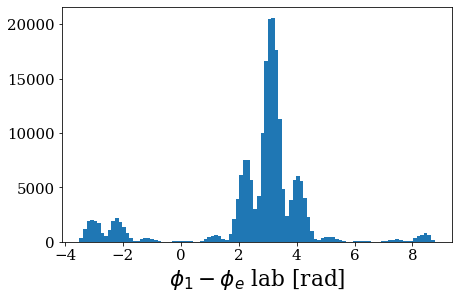

In [617]:
plt.hist(dfs_data['D_2pi'].eval(f"(h1_ph)*({np.pi}/180)-e_ph"),bins=100)
plt.gca().set_xlabel("$\\phi_1-\\phi_e$ lab [rad]")
#plt.gca().set_yscale("log")
plt.show()

Text(0.5, 0, 'p [GeV]')

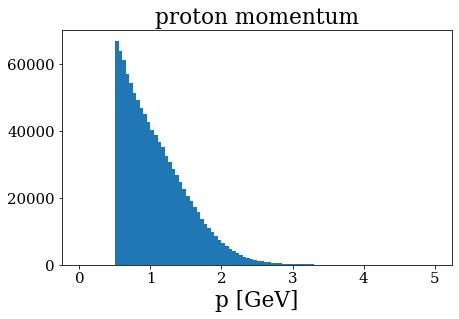

In [47]:
df = dfs_data['D'].query("h2_pid==2212")
plt.hist(df.h2_p, bins=100, range=(0,5))
plt.title("proton momentum")
plt.xlabel("p [GeV]")

In [25]:
def get_df_R2h(df_A,df_D,df_triggers_A,df_triggers_D,
                              fig=None,bins=np.linspace(0.3,1.7,11), xvar='pair_mass',
               query=None,trigger_query=None):
    if query is not None:
        df_A= df_A.query(query)
        df_D= df_D.query(query)
            
    nbins = len(bins)-1
    
    if trigger_query is not None:
        ntr_A = len(df_triggers_A.query(trigger_query))
    else :
        ntr_A = len(df_triggers_A)
    y, x = np.histogram(df_A.eval(xvar), bins=bins)
    x = np.add(x[1:],x[:-1])/2
    dy = np.sqrt(y)
    y=np.divide(y,ntr_A)
    dy=np.divide(dy,ntr_A)
    #print(y,dy)
    
    if trigger_query is not None:
        ntr_D = len(df_triggers_D.query(trigger_query))
    else :
        ntr_D = len(df_triggers_D)
    yd, _ = np.histogram(df_D.eval(xvar), bins=bins)
    dyd = np.sqrt(yd)
    yd=np.divide(yd,ntr_D)
    dyd=np.divide(dyd,ntr_D)
    
    
    dyc = y/yd*np.hypot(dy/y, dyd/yd)
    yc= y/yd
    
    
    print("ntrigsA =",ntr_A,",  ntrigsD=",ntr_D)
    return pd.DataFrame({"y":yc,"dy":dyc, "x":x})
    #print(label, yc, dyc)

In [26]:

from scipy.stats import chi2 as chi2lib
from scipy.stats import norm as normlib
from scipy.stats import binom as binomlib

In [27]:
def check_for_equality(y1, dy1,y2,dy2=0, ndof=None, printInfo=True):
    if ndof is None:
        ndof = len(y1)
    normedResiduals = (y1-y2)/np.hypot(dy1,dy2)
    #print(normedResiduals)
    chi2 = np.sum(normedResiduals**2)
    pval_chi2 = chi2lib.sf(chi2,ndof)
    if printInfo == 1:
        print(f"chi2 test\n: chi2={chi2:2f}\nndof={ndof}\npval={pval_chi2:3f}")
    
    rms_diff = np.sqrt(np.mean((y1-y2)**2))
    if printInfo==1:
        print(f"\nrms difference: ", rms_diff)
    
    #now do look-elsewhere-effect test on the largest residual
    largestNormedResidual = 0
    i = 0
    for ii,zi in enumerate(normedResiduals):
        if abs(zi) > abs(largestNormedResidual):
            largestNormedResidual=abs(zi)
            i = ii
    if printInfo == 1:
        print(f"\nLEE test:\n largest normed residual ={largestNormedResidual:2f} at bin {i}")
    pval_local = 2*normlib.sf(abs(largestNormedResidual))
    if printInfo == 1:
        print(f"local pval: {pval_local:3f}")
    pval_global = 1-(1-pval_local)**ndof
    if printInfo == 1:
        print(f"global pval: {pval_global:3f}")
    
    #now check if there is a systematic trend in the signs of the residuals
    n_positives = sum(normedResiduals>0)
    
    pval_signs = binomlib.sf(n_positives,len(y1), 0.5)
    if pval_signs < 0.5:
        pval_signs = 2*pval_signs
    if pval_signs > 0.5:
        pval_signs = 2*(1-pval_signs)
    if printInfo == 1:
        print(f"\nsigns test:\npval:  {pval_signs}")
    #more compact level of information printing
    if printInfo == 2:
        print(f"p_chi2 ={pval_chi2:3f}; p_lee ={pval_global:3f}; p_signs ={pval_signs:3f}")
    return pval_chi2, pval_global, pval_signs

In [28]:
def check_for_equality_of_dfs(df1,df2,**arg):
    y1 = df1.y
    dy1 = df1.dy
    y2 = df2.y
    dy2 = df2.dy
    
    return check_for_equality(y1, dy1,y2,dy2, **arg)



 h2_z Fe
ntrigsA = 166612 ,  ntrigsD= 299481
ntrigsA = 178386 ,  ntrigsD= 314076
chi2 test
: chi2=17.582259
ndof=8
pval=0.024586

rms difference:  0.052096271359533534

LEE test:
 largest normed residual =3.439308 at bin 0
local pval: 0.000583
global pval: 0.004656

signs test:
pval:  0.2890624999999999
ntrigsA = 345393 ,  ntrigsD= 614296


 pair_mass Fe
ntrigsA = 166612 ,  ntrigsD= 299481
ntrigsA = 178386 ,  ntrigsD= 314076
chi2 test
: chi2=11.766558
ndof=10
pval=0.300984

rms difference:  0.04200178926717956

LEE test:
 largest normed residual =1.790181 at bin 1
local pval: 0.073425
global pval: 0.533548

signs test:
pval:  0.3437499999999999
ntrigsA = 345393 ,  ntrigsD= 614296


 dphi Fe
ntrigsA = 166612 ,  ntrigsD= 299481
ntrigsA = 178386 ,  ntrigsD= 314076
chi2 test
: chi2=8.138471
ndof=8
pval=0.420062

rms difference:  0.03795687217705896

LEE test:
 largest normed residual =1.654076 at bin 3
local pval: 0.098112
global pval: 0.562256

signs test:
pval:  0.0
ntrigsA = 345393 , 

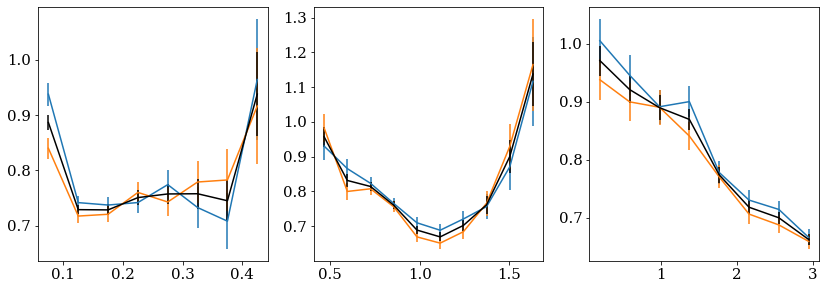

In [29]:
z2 = {"xvar":"h2_z", "bins":np.linspace(0.05,0.45,9)}
pair_mass = {"xvar":"pair_mass", "bins":np.linspace(0.4,1.7,11)}
dphi = {"xvar":"dphi", "bins":np.linspace(0,3.14,9)}

fig,axs = plt.subplots(1,3, figsize=(14,14/3))
for i,xvar in enumerate([z2, pair_mass, dphi]):
    for j,A in enumerate("Fe".split()):
        df_A = dfs_data[A+"_2pi"]
        df_D = dfs_data["D_"+A+"_2pi"]
        df_triggers_A = dfs_trigger[A]
        df_triggers_D = dfs_trigger["D_"+A]
        print("\n\n",xvar['xvar'], A)
        
        for df in df_A,df_D,df_triggers_A,df_triggers_D:
            df['f_order'] = pd.Series(range(len(df)))/len(df)
        df_res = []
        timestamp="run"
        median_run = np.quantile(list(set(df_A.run)), .5)+0.5
        n = 2
        for ii in range(n):
        #for q,qtrig in []
            q = f"run>={np.quantile(list(df_A.run), ii/n)} and run<{np.quantile(list(df_A.run), (ii+1)/n)}"
            df_res.append(get_df_R2h(df_A,df_D,df_triggers_A,df_triggers_D,
                                  fig=None,**xvar,
                                   query=q,trigger_query=q))
        #check_for_equality_of_dfs_multi(df_res,printInfo=2)
        check_for_equality_of_dfs(df_res[0],df_res[1],printInfo=1)
        plt.sca(axs[i])
        df_res.append(get_df_R2h(df_A,df_D,df_triggers_A,df_triggers_D,
                                  fig=None,**xvar))
        for ii in range(n+1):
            plt.errorbar(df_res[ii].x,df_res[ii].y,df_res[ii].dy,color=None if ii != n else 'k')



 h2_z C
ntrigsA = 144321 ,  ntrigsD= 199792
ntrigsA = 147279 ,  ntrigsD= 205757
chi2 test
: chi2=7.777860
ndof=8
pval=0.455465

LEE test:
 largest normed residual =1.447898 at bin 4
local pval: 0.147646
global pval: 0.721413

signs test:
pval:  0.5468749999999996


 h2_z Fe
ntrigsA = 164381 ,  ntrigsD= 294894
ntrigsA = 176463 ,  ntrigsD= 309945
chi2 test
: chi2=17.075769
ndof=8
pval=0.029330
Failed chi2 test (p<0.05).  estimated systematic error: 0.00856488496267503

LEE test:
 largest normed residual =3.265642 at bin 0
local pval: 0.001092
global pval: 0.008704

signs test:
pval:  0.2890624999999999


 h2_z Pb
ntrigsA = 61520 ,  ntrigsD= 311816
ntrigsA = 62238 ,  ntrigsD= 317997
chi2 test
: chi2=11.572309
ndof=8
pval=0.171331

LEE test:
 largest normed residual =2.479927 at bin 1
local pval: 0.013141
global pval: 0.100417

signs test:
pval:  0.7265625000000002


 pair_mass C
ntrigsA = 144321 ,  ntrigsD= 199792
ntrigsA = 147279 ,  ntrigsD= 205757
chi2 test
: chi2=9.672725
ndof=10
pva

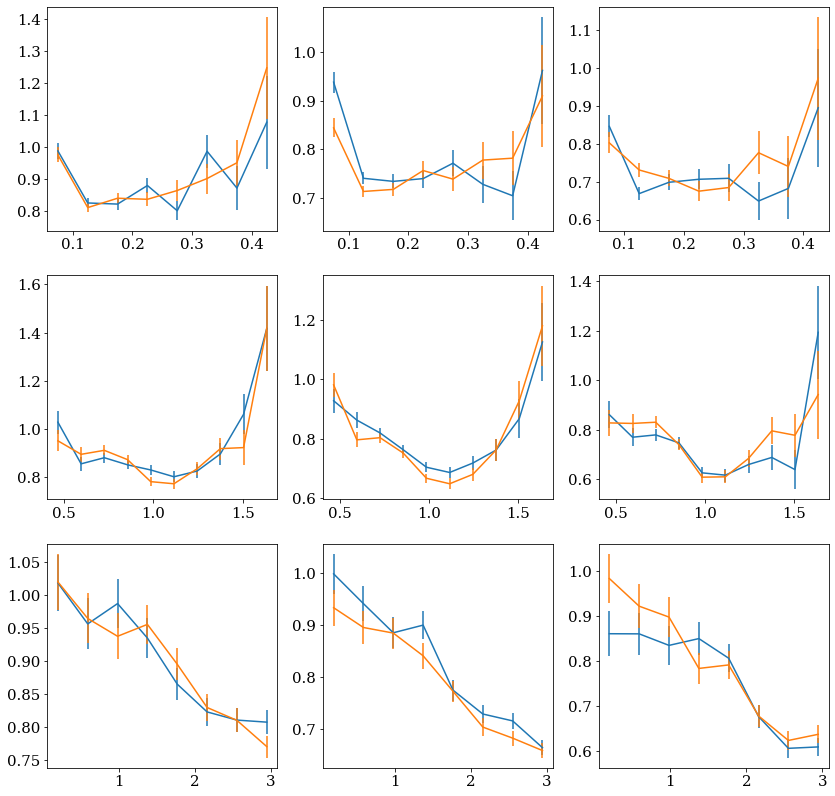

In [689]:
imp.reload(syst_util)
z2 = {"xvar":"h2_z", "bins":np.linspace(0.05,0.45,9)}
pair_mass = {"xvar":"pair_mass", "bins":np.linspace(0.4,1.7,11)}
dphi = {"xvar":"dphi", "bins":np.linspace(0,3.14,9)}

fig,axs = plt.subplots(3,3, figsize=(14,14))
for i,xvar in enumerate([z2, pair_mass, dphi]):
    for j,A in enumerate("C Fe Pb".split()):
        #q = "run < 41470 or run > 41545"
        q = "run != 420"
        df_A = dfs_data[A+"_2pi"].query(q)
        df_D = dfs_data["D_"+A+"_2pi"].query(q)
        df_triggers_A = dfs_trigger[A].query(q)
        df_triggers_D = dfs_trigger["D_"+A].query(q)
        print("\n\n",xvar['xvar'], A)
        
        
        df_res = []
        timestamp="run"
        median_run = np.quantile(df_A.run, 0.5)
        for q,qtrig in [(f"{timestamp}<{median_run}",f"{timestamp}<{median_run}"),
                           (f"{timestamp}>={median_run}",f"{timestamp}>={median_run}")]:
            df_res.append(get_df_R2h(df_A,df_D,df_triggers_A,df_triggers_D,
                                  fig=None,**xvar,
                                   query=q,trigger_query=qtrig))
        syst_util.check_for_equality_of_dfs(df_res[0],df_res[1],printInfo=1)
        plt.sca(axs[i][j])
        plt.errorbar(df_res[0].x,df_res[0].y,df_res[0].dy)
        plt.errorbar(df_res[1].x,df_res[1].y,df_res[1].dy)

In [682]:
#plt.hist(dfs_data['Pb'].run,bins=100)
for a in "C Fe Pb".split():
    print(len(dfs_data[f'{a}_2pi']))

31917
32280
11071


In [576]:
def check_for_equality_of_dfs_multi(dfs,**arg):
    y1 = pd.concat([df.y for df in dfs])
    dy1 = pd.concat([df.dy for df in dfs])
    
    y2 = pd.Series([0]*len(dfs[0]))
    dy2 = pd.Series([0]*len(dfs[0]))
    wsum = 0
    for df in dfs:
        w = 1/df.dy**2
        y2+= df.y*w
        dy2+= w
        wsum +=w
    y2/=wsum
    dy2 =np.sqrt(1/dy2)
    y2 = pd.concat([y2 for df in dfs])
    dy2 = pd.concat([dy2 for df in dfs])
    ndof = len(dfs[0])*(len(dfs)-1)
    #print(y2,dy2)
    return check_for_equality(y1, dy1,y2,dy2,ndof=ndof, **arg)



 h2_z C
ntrigsA = 54947 ,  ntrigsD= 77056
ntrigsA = 52505 ,  ntrigsD= 73067
ntrigsA = 46378 ,  ntrigsD= 64875
ntrigsA = 47400 ,  ntrigsD= 66335
ntrigsA = 38763 ,  ntrigsD= 52884
ntrigsA = 51607 ,  ntrigsD= 71332
h2_z C
bin	 Sector 1	 	Sector 2	 	Sector 3	 	Sector 4	 	Sector 5	 	Sector 6	 
	 R2h	err	R2h	err	R2h	err	R2h	err	R2h	err	R2h	err
0	 0.972	0.039	0.922	0.038	0.989	0.042	1.052	0.045	0.994	0.047	0.970	0.041
1	 0.810	0.024	0.833	0.024	0.821	0.026	0.812	0.025	0.822	0.029	0.805	0.024
2	 0.823	0.028	0.854	0.030	0.828	0.030	0.821	0.030	0.845	0.034	0.811	0.029
3	 0.869	0.038	0.887	0.039	0.790	0.038	0.851	0.039	0.861	0.044	0.872	0.039
4	 0.848	0.053	0.803	0.049	0.886	0.059	0.819	0.053	0.858	0.059	0.790	0.050
5	 0.871	0.073	0.993	0.090	1.054	0.096	0.951	0.085	0.943	0.094	0.862	0.080
6	 1.124	0.144	0.981	0.138	0.786	0.103	0.947	0.131	0.761	0.112	0.894	0.115
7	 1.211	0.268	0.863	0.197	1.127	0.281	1.072	0.237	1.714	0.368	1.071	0.256
p_chi2 =0.982809; p_lee =0.987851; p_signs =0.470879


 h2

ntrigsA = 20459 ,  ntrigsD= 105294
ntrigsA = 22213 ,  ntrigsD= 111592
dphi Pb
bin	 Sector 1	 	Sector 2	 	Sector 3	 	Sector 4	 	Sector 5	 	Sector 6	 
	 R2h	err	R2h	err	R2h	err	R2h	err	R2h	err	R2h	err
0	 0.836	0.079	0.992	0.092	1.142	0.132	0.829	0.081	0.906	0.089	0.926	0.086
1	 0.847	0.077	0.900	0.086	0.845	0.093	0.824	0.079	0.906	0.082	1.008	0.086
2	 0.913	0.073	0.940	0.082	0.826	0.081	0.831	0.074	0.861	0.075	0.823	0.070
3	 0.765	0.056	0.797	0.062	0.856	0.066	0.778	0.062	0.879	0.064	0.833	0.061
4	 0.818	0.052	0.771	0.052	0.821	0.057	0.770	0.053	0.836	0.053	0.780	0.050
5	 0.689	0.043	0.744	0.044	0.683	0.046	0.619	0.041	0.712	0.046	0.624	0.040
6	 0.594	0.035	0.610	0.035	0.657	0.040	0.609	0.035	0.611	0.037	0.616	0.035
7	 0.636	0.035	0.577	0.032	0.618	0.036	0.653	0.035	0.621	0.036	0.637	0.035
p_chi2 =0.986400; p_lee =0.978745; p_signs =0.885433


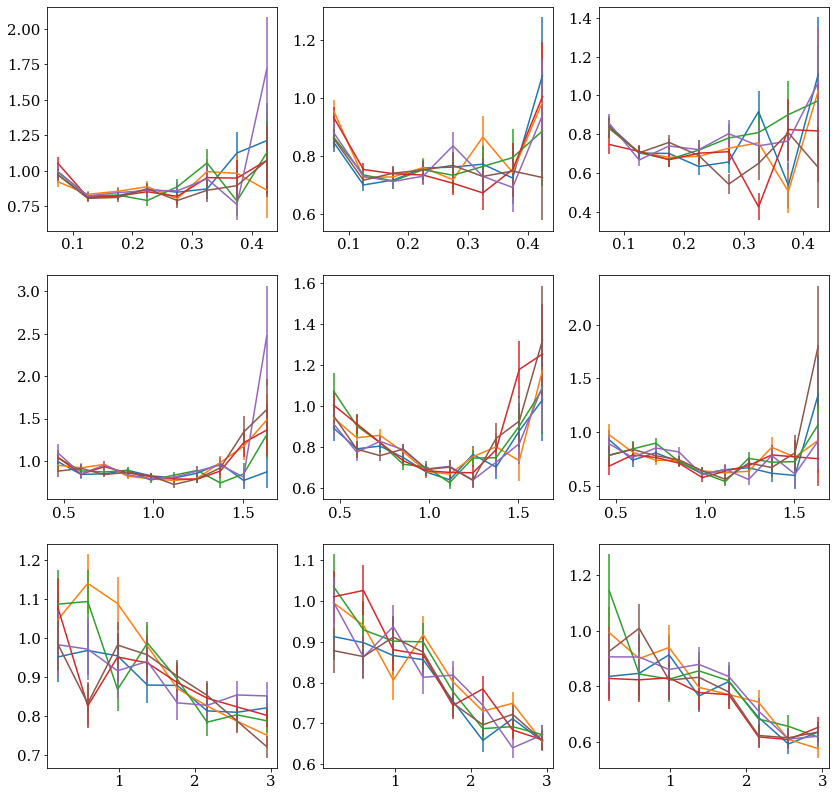

In [577]:
z2 = {"xvar":"h2_z", "bins":np.linspace(0.05,0.45,9)}
pair_mass = {"xvar":"pair_mass", "bins":np.linspace(0.4,1.7,11)}
dphi = {"xvar":"dphi", "bins":np.linspace(0,3.14,9)}

fig,axs = plt.subplots(3,3, figsize=(14,14))
for i,xvar in enumerate([z2, pair_mass, dphi]):
    for j,A in enumerate("C Fe Pb".split()):
        df_A = dfs_data[A+"_2pi"]
        df_D = dfs_data["D_"+A+"_2pi"]
        df_triggers_A = dfs_trigger[A]
        df_triggers_D = dfs_trigger["D_"+A]
        print("\n\n",xvar['xvar'], A)
        df_res = []
        for q,qtrig in [(f"h1_Sector=={s}",f"h1_Sector=={s}") for s in [0,1,2,3,4,5]]:
            df = get_df_R2h(df_A,df_D,df_triggers_A,df_triggers_D,
                                  fig=None,**xvar,
                                   query=q,trigger_query=qtrig)
            df_res.append(df)
        print(xvar['xvar'], A)
        print("bin\t", "\t".join([f"Sector {i}\t " for i in range(1,7)]))
        print("\t", "\t".join([f"R2h\terr" for i in range(1,7)]))
        for ii in range(len(df_res[0])):
            print(f"{ii}\t","\t".join([f"{df.y[ii]:.3f}\t{df.dy[ii]:.3f}" for df in df_res]))
        check_for_equality_of_dfs_multi(df_res,printInfo=2)
        plt.sca(axs[i][j])
        for df in df_res:
            plt.errorbar(df.x,df.y,df.dy)

In [578]:
print(dfs_data['D_2pi'].columns)

Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'e_px', 'e_py',
       'e_pz', 'e_p', 'e_ph', 'e_th', 'SampFracEl25', 'SampFracEl20',
       'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th',
       'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector',
       'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus',
       'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC',
       'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'run', 'z_tot',
       'h1_e', 'h1_p', 'h2_e', 'h2_p', 'h1_mass2_TOF', 'h2_mass2_TOF',
       'pair_pt2'],
      dtype='object')


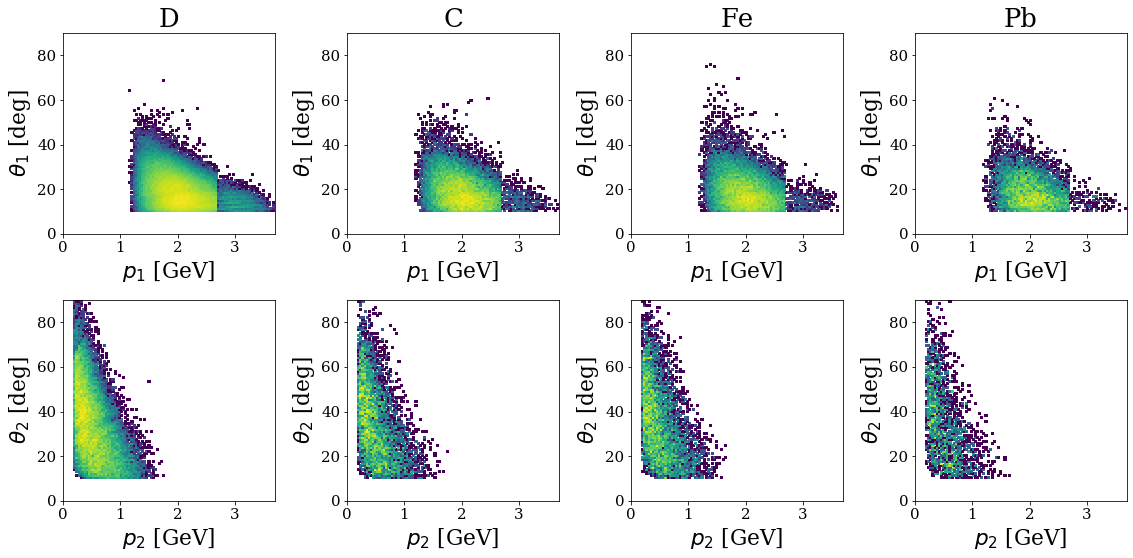

In [708]:
fig,axs = plt.subplots(2,4, figsize=(16, 8))
r= [(0, 3.7), (0,90)]
for i,A in enumerate("D C Fe Pb".split()):
    df =dfs_data[A+"_2pi"].query("h1_pid==211")
    plt.sca(axs[0][i])
    plt.gca().set_ylabel("$\\theta_1$ [deg]")
    plt.gca().set_xlabel("$p_1$ [GeV]")
    plt.gca().set_title(A,fontsize='xx-large')
    plt.hist2d(df.h1_p, df.h1_th, bins=100,  norm = mpl.colors.LogNorm(), range=r)
    plt.sca(axs[1][i])
    plt.gca().set_ylabel("$\\theta_2$ [deg]")
    plt.gca().set_xlabel("$p_2$ [GeV]")
    df =dfs_data[A+"_2pi"].query("h2_pid==211")
    plt.hist2d(df.h2_p, df.h2_th, bins=100,  norm = mpl.colors.LogNorm(), range=r)
    
fig.tight_layout()

In [580]:
mpi = 0.140
mK = 0.494

l = 5
p = pd.Series([.25, .75,1.25,1.75,2.25,2.75,3.75])
deltaT = 5/.3*(p/np.hypot(p,mpi)-p/np.hypot(p,mK))
print(deltaT*61)#print the number of pixels, so that I can add them to Figs 3.3 and 3.5

p = pd.Series([.375,.625, .875,1.125,1.375,1.625,1.875,2.125,2.375,2.6])
deltaT = 5/.3*(p/np.hypot(p,mpi)-p/np.hypot(p,mK))
print(deltaT*44)#print the number of pixels, so that I can add them to Figs 3.3 and 3.5


0    427.978906
1    150.364275
2     64.841330
3     34.998314
4     21.689900
5     14.701998
6      8.000508
dtype: float64
0    243.619227
1    140.278670
2     85.533755
3     56.269238
4     39.417503
5     28.998025
6     22.163559
7     17.460637
8     14.095831
9     11.827925
dtype: float64


0.10374602937402977
0.15388151118101168
0.17776573572321802


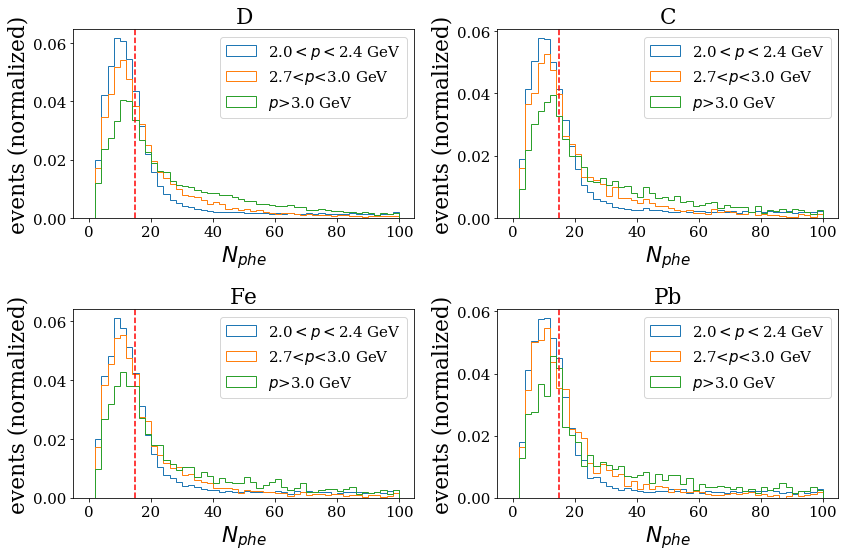

In [43]:
fig,axs = plt.subplots(2,2,figsize=(12,8))
for i,A in enumerate('D C Fe Pb'.split()):
    plt.sca(axs[i//2][i%2])
    r = ((0,5),(0,500))
    df = dfs_data[A]
    #for i,(q,label) in enumerate((("2.0<h1_p<2.2", "2.0$<p<$2.2 GeV"),
    #                ("h1_p>2.7 and h1_p<3.0", "2.7<$p$<3.0 GeV"),
    #                ("h1_p>3.0 and h1_p<3.3", "3.0<$p$<3.3 GeV"),
    #                ("h1_p>3.3", "$p$>3.3 GeV"))):
    for i,(q,label) in enumerate((("2.0<h1_p<2.4", "2.0$<p<$2.4 GeV"),
                    ("h1_p>2.7 and h1_p<3.0", "2.7<$p$<3.0 GeV"),
                    ("h1_p>3.0", "$p$>3.0 GeV"))):
        expr =  "h1_Nphe"
        plt.hist(df.query(q).eval(expr),bins=50,range=(0,100), 
             histtype='step',label=label, density=True)
        if A == 'D':
            print(len(df.query(q).query("h1_Nphe>0"))/len(df.query(q)))
        
    plt.gca().set_xlabel("$N_{phe}$")
    plt.gca().set_ylabel("events (normalized)")
    plt.gca().legend()
    plt.gca().set_title(A)
    #plt.yscale('log')
    plt.gca().axvline(15, color='r', linestyle='--')
    #plt.hist2d(df.h1_p,df.h1_Nphe*(df.h1_Nphe>0), range=r,bins=100, norm = mpl.colors.LogNorm())
plt.tight_layout()
plt.show()

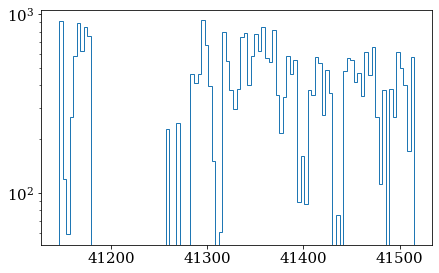

In [693]:
for a in "Fe".split():
    df = dfs_data[f'{a}_2pi']
    plt.hist(df.run,bins=100, histtype='step')
    plt.gca().set_yscale("log")

In [706]:
runs = sorted(set(dfs_data[f'Fe_2pi'].run))
print(runs)
print(len(runs))
runs_in_note=[int(i) for i in """41146 41147 41148 41149 41150 41153 41155 41158 41159 41161 
41163 41164 41165 41166 41167 41168 41170 41171 41172 41173 
41174 41175 41176 41177 41178 41179 41180 41181 41182 41184 
41188 41189 41192 41197 41199 41200 41205 41206 41207 41208 
41209 41210 41211 41212 41213 41214 41218 41220 41222 41235 
41236 41239 41240 41241 41243 41244 41245 41247 41248 41249 
41252 41256 41258 41259 41260 41261 41262 41263 41264 41265 
41266 41267 41268 41269 41270 41271 41272 41273 41276 41285 
41286 41287 41288 41289 41290 41291 41292 41293 41294 41295 
41296 41297 41298 41299 41300 41301 41302 41306 41314 41316 
41317 41318 41319 41320 41321 41322 41325 41326 41327 41328 
41331 41332 41335 41336 41337 41338 41339 41340 41341 41344 
41345 41346 41347 41348 41349 41350 41351 41352 41353 41354 
41355 41356 41357 41358 41359 41360 41361 41362 41363 41364 
41365 41366 41368 41369 41370 41371 41372 41373 41376 41377 
41379 41382 41383 41384 41385 41386 41388 41389 41391 41392 
41393 41395 41398 41399 41400 41402 41403 41405 41406 41407 
41408 41409 41410 41413 41414 41415 41416 41417 41419 41420 
41421 41424 41425 41426 41428 41429 41436 41442 41443 41444 
41445 41446 41447 41450 41451 41452 41453 41454 41455 41457 
41458 41459 41460 41461 41465 41466 41467 41468 41469 41470 
41471 41472 41473 41474 41475 41476 41478 41479 41482 41483 
41490 41492 41493 41496 41497 41498 41499 41500 41501 41502  
41503 41504 41505 41509 41512 41513 41514 41515 41516 41517 
41518 41519 41520 41521 41524 41525 41526 41527 41528 41529 
41531 41532 41533 41535 41536 41537 41538 41539 41540 41541  
41542 41543                                                 """.split()]
print(len(runs_in_note))
s = ''
for run in runs:
    if run not in runs_in_note:
        s+= f" and run != {run}"
print(runs_in_note)
print(s)
for run in runs_in_note:
    if run not in runs:
        print(f" missing run {run}")

[41146, 41147, 41148, 41149, 41150, 41153, 41155, 41158, 41159, 41161, 41163, 41164, 41165, 41166, 41167, 41168, 41169, 41170, 41171, 41172, 41173, 41174, 41175, 41176, 41177, 41178, 41179, 41260, 41270, 41285, 41286, 41287, 41288, 41289, 41290, 41291, 41292, 41293, 41294, 41295, 41296, 41297, 41298, 41299, 41300, 41301, 41302, 41306, 41314, 41316, 41317, 41318, 41319, 41320, 41321, 41322, 41325, 41326, 41327, 41328, 41331, 41332, 41335, 41336, 41337, 41338, 41339, 41340, 41341, 41344, 41345, 41346, 41347, 41348, 41349, 41350, 41351, 41352, 41353, 41354, 41355, 41356, 41357, 41358, 41359, 41360, 41361, 41362, 41363, 41364, 41365, 41366, 41368, 41369, 41370, 41371, 41372, 41373, 41376, 41377, 41379, 41382, 41383, 41384, 41385, 41386, 41387, 41388, 41389, 41391, 41392, 41393, 41394, 41395, 41398, 41399, 41400, 41402, 41403, 41405, 41406, 41407, 41408, 41409, 41410, 41413, 41414, 41415, 41416, 41417, 41419, 41420, 41421, 41424, 41425, 41426, 41428, 41429, 41436, 41442, 41443, 41444, 41445